# EDA for insurance claim prediction

### Problem Statement

**Analyze the given customer data from an insurance company and Predict whether to sanction insurance or not.**

### Analysis of Problem Statement

We have to predict a yes/no kind of output.

Sanction Insurance - Yes

Sanction Insurance - No

Hence, this is a classification problem.

### Potential Business Problems

1. Reduce potential defaulting customers from the given dataset.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# For some Statistics
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer

# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

# Encoding categorical features
from sklearn.preprocessing import LabelEncoder

In [2]:
# Creating path variable to read data
raw_data_path = os.path.abspath(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(),os.path.pardir),'data'),'raw'),'train.csv'))
root_path = os.path.abspath(os.path.join(os.path.join(os.getcwd(),os.path.pardir),os.path.pardir))

In [3]:
# Creating path variable to read data
raw_data_path_test = os.path.abspath(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(),os.path.pardir),'data'),'raw'),'test.csv'))

In [4]:
df_test = pd.read_csv(raw_data_path_test)

In [5]:
sys.path.append(root_path)

In [6]:
from insurance_risk_analysis.eda import get_class_counts, normality_plots

In [7]:
# Read training data
df = pd.read_csv(raw_data_path)

## Dataset information:

There are 10 predictor features and 1 Target feature (Claim Status).

Target: Claim Status (Claim.Status)
Name of agency (Agency)
Type of travel insurance agencies (Agency.Type)
Distribution channel of travel insurance agencies (Distribution.Channel)
Name of the travel insurance products (Product.Name)
Duration of travel (Duration)
Destination of travel (Destination)
Amount of sales of travel insurance policies (Net.Sales)
The commission received for travel insurance agency (Commission)
Gender of insured (Gender)
Age of insured (Age)

In [8]:
# having a peek into data
df.head()

ID Agency    Agency Type Distribution Channel  \
0   3433    CWT  Travel Agency               Online   
1   4339    EPX  Travel Agency               Online   
2  34590    CWT  Travel Agency               Online   
3  55816    EPX  Travel Agency               Online   
4  13816    EPX  Travel Agency               Online   

                      Product Name  Claim  Duration         Destination  \
0  Rental Vehicle Excess Insurance      0         7            MALAYSIA   
1                Cancellation Plan      0        85           SINGAPORE   
2  Rental Vehicle Excess Insurance      0        11            MALAYSIA   
3         2 way Comprehensive Plan      0        16           INDONESIA   
4                Cancellation Plan      0        10  KOREA, REPUBLIC OF   

   Net Sales  Commision (in value) Gender  Age  
0        0.0                 17.82    NaN   31  
1       69.0                  0.00    NaN   36  
2       19.8                 11.88    NaN   75  
3       20.0                  0.00    NaN   32  
4       15.0                  0.00    NaN   29

In [9]:
# getting info about training set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 12 columns):
ID                      50660 non-null int64
Agency                  50660 non-null object
Agency Type             50660 non-null object
Distribution Channel    50660 non-null object
Product Name            50660 non-null object
Claim                   50660 non-null int64
Duration                50660 non-null int64
Destination             50660 non-null object
Net Sales               50660 non-null float64
Commision (in value)    50660 non-null float64
Gender                  14614 non-null object
Age                     50660 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [10]:
# checking is there any null values in the dataframe
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  36046
Age                         0
dtype: int64

**Insights**
1. There are null values in Gender column

In [11]:
df['Agency Type'].value_counts()

Travel Agency    36672
Airlines         13988
Name: Agency Type, dtype: int64

### Observations:
36,672 customers prefer to travel with Travel Agency

13,988 (Approx. 14k) customers prefer to travel with Airlines

In [12]:
df['Distribution Channel'].value_counts()

Online     49770
Offline      890
Name: Distribution Channel, dtype: int64

**Observation**
Distribution of Travel Insurance is majorly via Online. 49770 customers have submitted claims Online

Only 890 customers have submitted claims offline/personal visit.

In [13]:
print("Count of Rejection Claims - {}".format(df[df['Claim'] ==0].count()[0]))
pd.DataFrame(df.groupby(['Agency Type'])['Claim'].value_counts())

Count of Rejection Claims - 49918


Claim
Agency Type   Claim       
Airlines      0      13514
              1        474
Travel Agency 0      36404
              1        268

In [14]:
pd.DataFrame(df['Agency Type'].value_counts())

Agency Type
Travel Agency        36672
Airlines             13988

***Airlines has the highest number of Approved Claims 474 out of 13988 claim applications***

***Travel Agency has low number of Approved Claims 268 out of 36672 claim applications to Travel Agency***

***
## Productwise Claim rejections
***

In [15]:

print("Count of Rejection Claims - {}".format(df[df['Claim'] ==0].count()[0]))
pd.DataFrame(df.groupby(['Product Name'])['Claim'].value_counts())

Count of Rejection Claims - 49918


Claim
Product Name                         Claim       
1 way Comprehensive Plan             0       2647
                                     1          8
2 way Comprehensive Plan             0      10389
                                     1        112
24 Protect                           0        199
Annual Gold Plan                     0        131
                                     1         17
Annual Silver Plan                   0       1028
                                     1        128
Annual Travel Protect Gold           0         71
                                     1         10
Annual Travel Protect Platinum       0         44
                                     1          1
Annual Travel Protect Silver         0         69
                                     1          4
Basic Plan                           0       4364
                                     1         19
Bronze Plan                          0       3084
                                     1        162
Cancellation Plan                    0      14893
                                     1         33
Child Comprehensive Plan             0          7
Comprehensive Plan                   0        288
                                     1          5
Gold Plan                            0        278
                                     1         14
Individual Comprehensive Plan        0         55
                                     1          3
Premier Plan                         0        156
                                     1          3
Rental Vehicle Excess Insurance      0       6784
                                     1         68
Silver Plan                          0       1671
                                     1        118
Single Trip Travel Protect Gold      0        152
                                     1          7
Single Trip Travel Protect Platinum  0         54
                                     1          5
Single Trip Travel Protect Silver    0        132
                                     1          2
Spouse or Parents Comprehensive Plan 0         11
                                     1          1
Ticket Protector                     0        834
                                     1          5
Travel Cruise Protect                0        419
                                     1          2
Travel Cruise Protect Family         0          1
Value Plan                           0       2157
                                     1         15

In [16]:
# finding % of nulls in gender column
nans = lambda df: df[df.isnull().any(axis=1)]
nan_percent = (len(nans(df))/len(df))*100
print(nan_percent,'% of data have NaN as Gender')

71.15278326095539 % of data have NaN as Gender


In [17]:
# Function to display all % of nulls in each group
def group_by_null(df, group_col, null_col):
    df2 = df[null_col].isnull().groupby([df[group_col]]).sum().astype(int).reset_index(name='count')
    df3 = pd.merge(df2,df[group_col].groupby([df[group_col]]).count().reset_index(name='total_count'),on=group_col)
    df3['null_%'] = (df3['count']/df3['total_count'])*100
    df4 = pd.DataFrame(df[df[null_col]=='F'].groupby([group_col])['ID'].count())
    df3 = pd.merge(df3,df4,on=group_col)
    df3.rename(columns={'ID':'Female_count'}, inplace=True)
    df4 = pd.DataFrame(df[df[null_col]=='M'].groupby([group_col])['ID'].count())
    df3 = pd.merge(df3,df4,on=group_col)
    df3.rename(columns={'ID':'Male_count'}, inplace=True)
    return df3
df.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [18]:
df.describe()

ID         Claim      Duration     Net Sales  \
count  50660.000000  50660.000000  50660.000000  50660.000000   
mean   31674.458014      0.014647     49.413383     40.837350   
std    18289.180100      0.120135    101.354774     48.884947   
min        0.000000      0.000000     -2.000000   -389.000000   
25%    15883.750000      0.000000      9.000000     18.000000   
50%    31646.500000      0.000000     22.000000     27.000000   
75%    47543.250000      0.000000     53.000000     48.500000   
max    63325.000000      1.000000   4881.000000    810.000000   

       Commision (in value)           Age  
count          50660.000000  50660.000000  
mean               9.834257     40.008231  
std               19.904720     14.074357  
min                0.000000      0.000000  
25%                0.000000     35.000000  
50%                0.000000     36.000000  
75%               11.550000     44.000000  
max              283.500000    118.000000

### Observation:
     Duration has negative value as minimum value which doesnt look correct. So this is a possible outlier.
     Age has zero value. So this is a possible outlier.

In [19]:
len(df[df['Duration'] < 0])/len(df)*100

0.005921831819976313

### Number of records with Duration less than 0 is 3 which is 0.006 percent approx. Hence, these records can be removed

In [20]:
# finding no of nulls in each agency
group_by_null(df,'Agency','Gender')

Agency  count  total_count     null_%  Female_count  Male_count
0     ADM     37           63  58.730159            13          13
1     ART      5          272   1.838235            81         186
2     C2B      0         6631   0.000000          3651        2980
3     CBH      0           81   0.000000            57          24
4     CCR      1          158   0.632911           116          41
5     CSR      0           68   0.000000            48          20
6     CWT   6847         6852  99.927029             3           2
7     JWT     15          606   2.475248           197         394
8     JZI     47         5069   0.927205          2051        2971
9     KML      0          318   0.000000           161         157
10    LWC      0          551   0.000000           309         242
11    RAB    172          571  30.122592           105         294
12    TST      1          422   0.236967           247         174
13    TTW      0           77   0.000000            38          39

In [21]:
# finding female and male count in each group of agency, agency type, destination
df1 = pd.DataFrame(df[df['Gender']=='F'].groupby(['Agency','Agency Type','Destination'])['ID'].count())
df1.rename(columns={'ID':'Female_count'}, inplace=True)
df2 = pd.DataFrame(df[df['Gender']=='M'].groupby(['Agency','Agency Type','Destination'])['ID'].count())
df2.rename(columns={'ID':'Male_count'}, inplace=True)
df3 = pd.merge(df1,df2,on=['Agency','Agency Type','Destination'])
df3

Female_count  Male_count
Agency Agency Type   Destination                                        
ADM    Travel Agency FRANCE                                9           9
                     NETHERLANDS                           2           2
ART    Airlines      CAMBODIA                              4           7
                     CHINA                                10          13
                     HONG KONG                             5          11
                     INDONESIA                             3           3
                     IRAN, ISLAMIC REPUBLIC OF             1           1
                     MALAYSIA                             10          21
                     MYANMAR                               1           4
                     PHILIPPINES                          28          56
                     SINGAPORE                             7          11
                     THAILAND                              5          28
                     UNITED ARAB EMIRATES                  3          14
                     UNITED KINGDOM                        1           1
                     VIET NAM                              2           7
C2B    Airlines      SINGAPORE                          3651        2980
CBH    Travel Agency MALAYSIA                             26          12
                     THAILAND                             30          12
CCR    Travel Agency MALAYSIA                             44          20
                     THAILAND                             71          21
CSR    Travel Agency MALAYSIA                             28           9
                     SPAIN                                 1           1
                     THAILAND                             18          10
JWT    Airlines      INDIA                               197         394
JZI    Airlines      AUSTRALIA                            77          86
                     AUSTRIA                               2           2
                     BRUNEI DARUSSALAM                     1           6
                     CAMBODIA                              4          35
                     CANADA                                7           9
                     CHINA                               289         631
...                                                      ...         ...
LWC    Travel Agency CHINA                                31          36
                     FRANCE                                5           3
                     GERMANY                               1           1
                     HONG KONG                            15           2
                     INDIA                                 7           1
                     INDONESIA                            12          14
                     ITALY                                 2           1
                     JAPAN                                15          10
                     MALAYSIA                             16          17
                     NEPAL                                 1           1
                     NEW ZEALAND                           2           4
                     PHILIPPINES                           9           8
                     POLAND                                1           1
                     SOUTH AFRICA                          1           1
                     SPAIN                                 1           2
                     SRI LANKA                             9           2
                     SWITZERLAND                           2           1
                     TAIWAN, PROVINCE OF CHINA            14          10
                     THAILAND                             19          19
                     UNITED ARAB EMIRATES                  2           1
                     UNITED KINGDOM                       14           6
                     UNITED STATES                        84          79
                     VIET NAM    

In [22]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  36046
Age                         0
dtype: int64

In [23]:
# no of unique values in each column
df.nunique()

ID                      50660
Agency                     16
Agency Type                 2
Distribution Channel        2
Product Name               26
Claim                       2
Duration                  444
Destination               144
Net Sales                1053
Commision (in value)      968
Gender                      2
Age                        88
dtype: int64

**Insights**
1. Agency type, distribution channel, claim, Gender have only 2 unique values. So label encoding for these values can be enough
2. Agency and product name have 16 and 26 unique values, so one hot encoding may be done

In [24]:
# Label encoding for Agency type, distribution channel, claim, Gender 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 


In [25]:
df['Agency Type'].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [26]:
# Encode labels in column 'species'. 
df_test['Agency Type']= label_encoder.fit_transform(df_test['Agency Type']) 
df_test['Agency Type'].unique()
df['Agency Type']= label_encoder.fit_transform(df['Agency Type']) 
df['Agency Type'].unique()

array([1, 0], dtype=int64)

In [27]:
df['Distribution Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [28]:

# Encode labels in column 'species'. 
df_test['Distribution Channel']= label_encoder.fit_transform(df_test['Distribution Channel']) 
df_test['Distribution Channel'].unique()
df['Distribution Channel']= label_encoder.fit_transform(df['Distribution Channel']) 
df['Distribution Channel'].unique()

array([1, 0], dtype=int64)

In [29]:
df.head()

ID Agency  Agency Type  Distribution Channel  \
0   3433    CWT            1                     1   
1   4339    EPX            1                     1   
2  34590    CWT            1                     1   
3  55816    EPX            1                     1   
4  13816    EPX            1                     1   

                      Product Name  Claim  Duration         Destination  \
0  Rental Vehicle Excess Insurance      0         7            MALAYSIA   
1                Cancellation Plan      0        85           SINGAPORE   
2  Rental Vehicle Excess Insurance      0        11            MALAYSIA   
3         2 way Comprehensive Plan      0        16           INDONESIA   
4                Cancellation Plan      0        10  KOREA, REPUBLIC OF   

   Net Sales  Commision (in value) Gender  Age  
0        0.0                 17.82    NaN   31  
1       69.0                  0.00    NaN   36  
2       19.8                 11.88    NaN   75  
3       20.0                  0.00    NaN   32  
4       15.0                  0.00    NaN   29

In [30]:
df.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

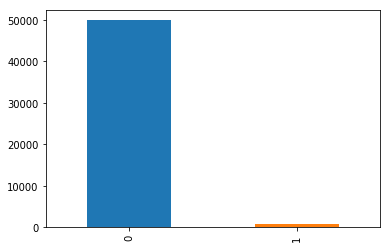

In [31]:
df['Claim'].value_counts().plot(kind='bar')

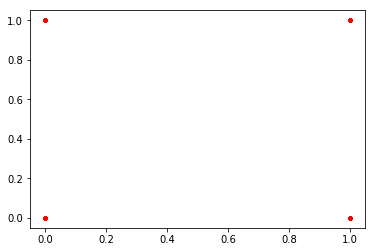

In [32]:
plt.plot(df['Distribution Channel'], df['Claim'], 'r.')
plt.show()

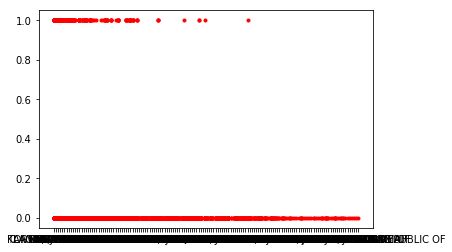

In [33]:
plt.plot(df['Destination'], df['Claim'], 'r.')
plt.show()

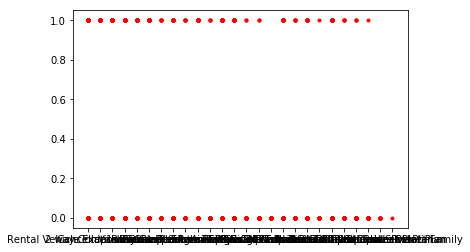

In [34]:
plt.plot(df['Product Name'], df['Claim'], 'r.')
plt.show()

In [35]:
# Multi colinearity detection
def plot_heatmap(df, fig_size=(10, 7)):
    fig = plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), annot=True)
    plt.title('Heatmap for detecting multicollinearity', fontsize=16, color='navy')
    plt.show()

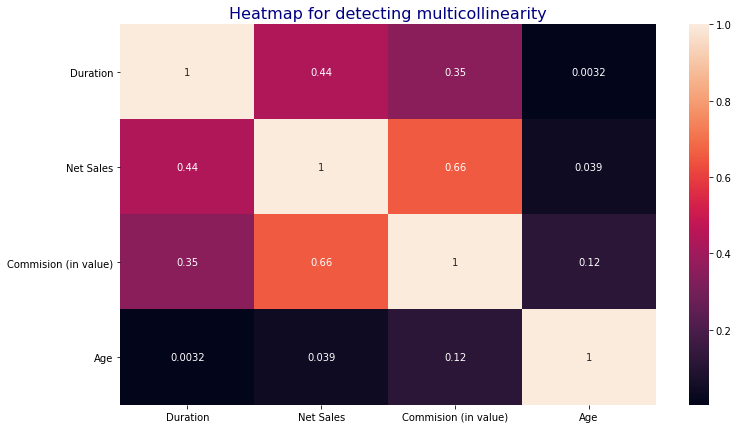

In [36]:
plot_heatmap(df[['Duration','Net Sales','Commision (in value)','Age']], fig_size=(12,7))

In [37]:
def scatter_target(df, ind_vars, target):
    for c in ind_vars:
        fig = plt.figure(figsize=(10, 5))
        sns.regplot(df[c], df[target], line_kws={'color':'midnightblue'}, color='lightsteelblue')
        plt.title('Scatterplot of '+ c + ' vs ' + target, color='navy', fontsize=16)
        plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


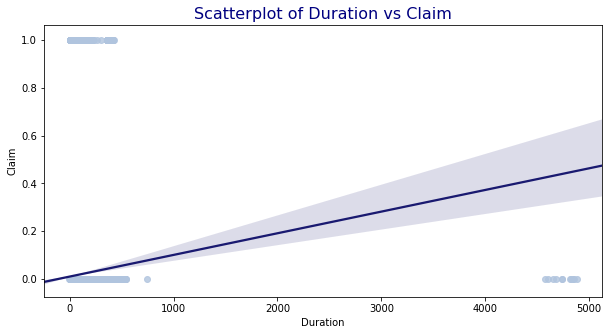

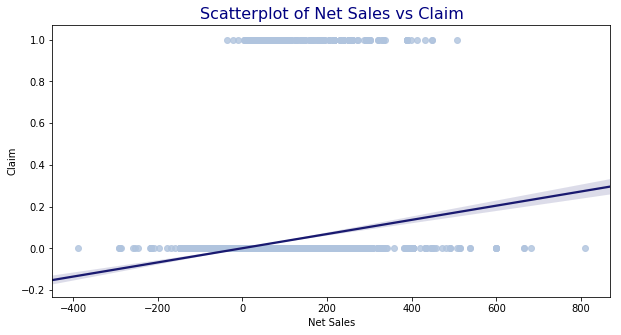

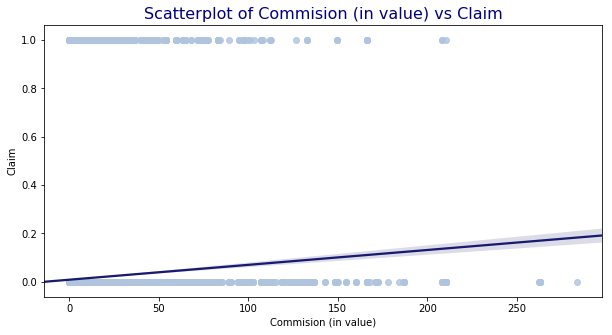

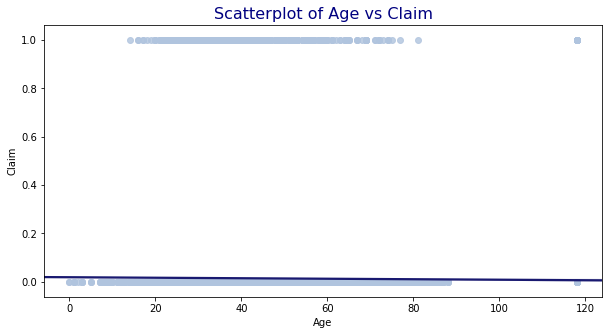

In [38]:
scatter_target(df=df, ind_vars=['Duration','Net Sales','Commision (in value)','Age'], target='Claim')

In [39]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [40]:
#Function to plot scatter plot for all combination columns
def df_scatter(df,target):
    fig, axs = plt.subplots(len(df.columns),1, figsize=(8, len(df.columns)*8), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    print(axs)
    for i,j in zip(df.columns,range(len(df.columns))):
        axs[j].scatter(x=df[i],y=df[target])
        axs[j].set_title('col: '+str(i)+'vs col: '+str(target))
        axs[j].set_xlabel(str(i))
        axs[j].set_ylabel(str(target))  
    plt.show()
#Function to find outlier % in a column
def outlier_percentage(df1,col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    iqr_val = Q3 - Q1
    outliers =  (df1[(df1[col]<Q1-1.5*iqr_val) | (df1[col]>Q3+1.5*iqr_val)])
    return (outliers[col].count()/(df1[col].count()))*100
#Function to plot every column's boxplot
def df_boxplot(df):
    fig, axs = plt.subplots(len(df.columns),1, figsize=(8, len(df.columns)*8), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i,j in zip(df.columns,range(len(df.columns))):
        axs[j].boxplot(df[i])
        axs[j].set_title('col: '+str(i)+'    outliers %: '+str(outlier_percentage(df,i)))
    plt.show()
#Function to find column type
def identify_col_type(df, col, threshold = 0.01):
    # Need to check for datetime
    if df[col].dtype!='object':
        if df[col].nunique()==2:
            return 'binary'
        if (df[col].nunique()/len(df[col])) < threshold:
            return 'categorical'
        else:
            return 'numerical'
    return 'categorical'

#Function to find out min, max, and mean of a column
def get_basic_measures(df1):
    basic_info = {}
    basic_info['col']=[]
    basic_info['min']=[]
    basic_info['max']=[]
    basic_info['mean']=[]
    for i in df1.columns:
        min_val = df1[i].min()
        max_val = df1[i].max()
        mean_val = df1[i].mean()
        basic_info['col'].append(i)
        basic_info['min'].append(min_val)
        basic_info['max'].append(max_val)
        basic_info['mean'].append(mean_val)
    return pd.DataFrame(basic_info)
def display_cat2cat(df, col1, col2):
    plt.figure(figsize=(15,8))
    crosstab = pd.crosstab(index=df[col2], columns=df[col1])
    crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
    plt.xticks(rotation = 90)
    plt.show()
    
    
def display_cat2num(df, col1, col2):
    plt.figure(figsize=(15,15))
    plt.xticks(rotation = 45)
    sns.boxplot(col1, col2, data=df)
    plt.show()
    
def display_num2num(df, col1, col2):
    sns.lmplot(col1, col2, data=df, fit_reg=True)
    plt.show()
    
def cat_countplot(df, col1):
    sns.countplot(y=col1, data=df)
    plt.show()
    

In [41]:
X = df.drop([ 'Claim'], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, 'Claim')

ID is NOT an important predictor. (Discard ID from model)
Agency is IMPORTANT for Prediction
Agency Type is IMPORTANT for Prediction
Distribution Channel is NOT an important predictor. (Discard Distribution Channel from model)
Product Name is IMPORTANT for Prediction
Duration is IMPORTANT for Prediction
Destination is IMPORTANT for Prediction
Net Sales is IMPORTANT for Prediction
Commision (in value) is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Age is IMPORTANT for Prediction


In [42]:
# Function to plot histogram of all columns
def df_hist(df):
    fig, axs = plt.subplots(len(df.columns),1, figsize=(8, len(df.columns)*8), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i,j in zip(df.columns,range(len(df.columns))):
        axs[j].hist(df[i])
        axs[j].set_title('col: '+str(i)+'    outliers %: '+str(outlier_percentage(df,i)))
    plt.show()
    

In [43]:
df.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

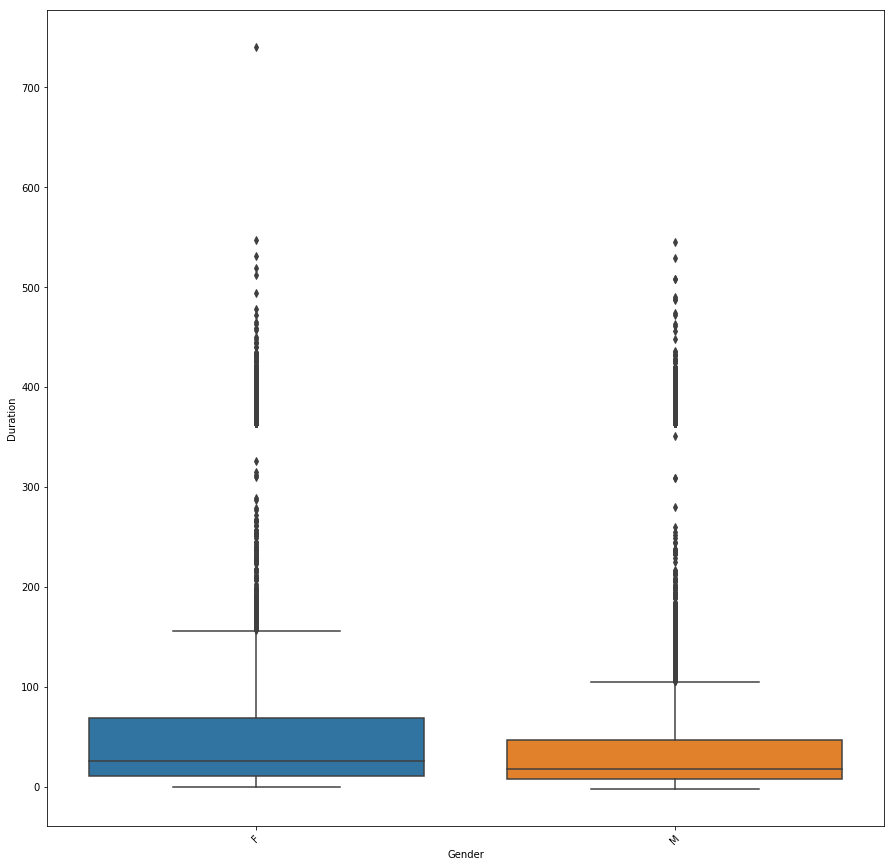

In [44]:
#Gender v/s Other Features

#Gender v/s Duration
display_cat2num(df, 'Gender', 'Duration')


<Figure size 1080x576 with 0 Axes>

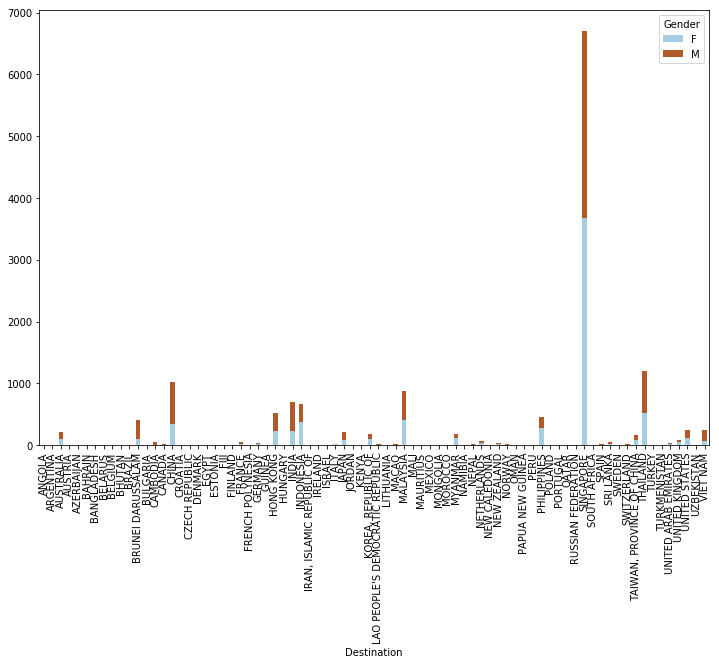

In [45]:
#Gender v/s Destination
display_cat2cat(df,'Gender','Destination')

<Figure size 1080x576 with 0 Axes>

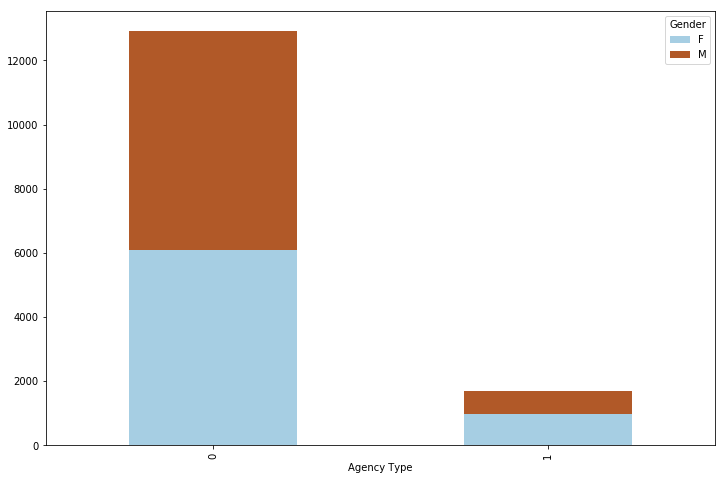

In [46]:

#Gender v/s Agency Type
display_cat2cat(df,'Gender','Agency Type')


<Figure size 1080x576 with 0 Axes>

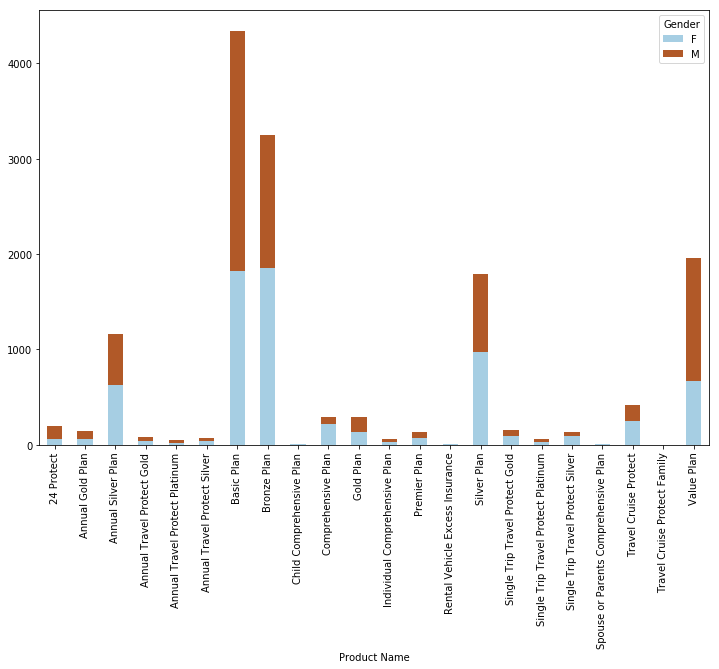

In [47]:

#Gender v/s Product
display_cat2cat(df,'Gender','Product Name')


<Figure size 1080x576 with 0 Axes>

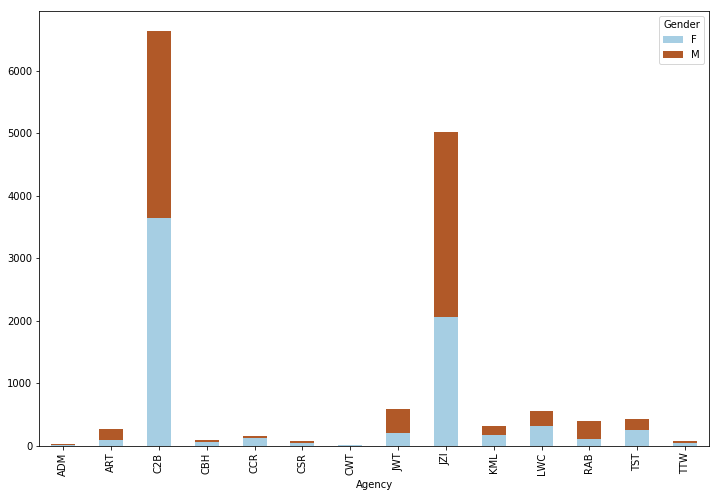

In [48]:

#Gender v/s Product
display_cat2cat(df,'Gender','Agency')


<Figure size 1080x576 with 0 Axes>

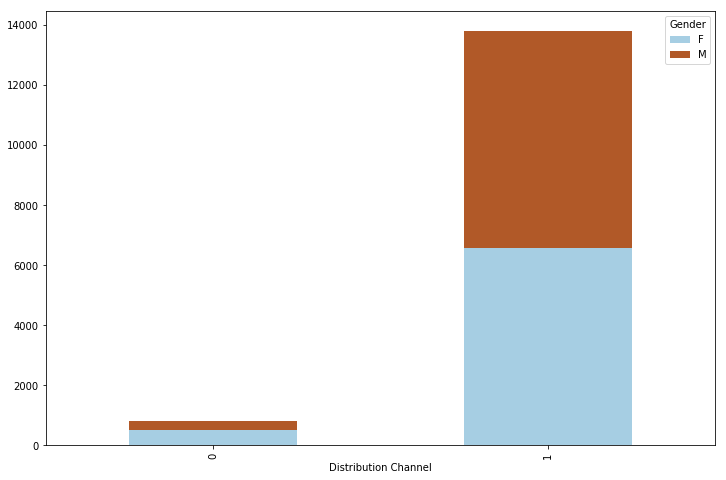

In [49]:

#Gender v/s Product
display_cat2cat(df,'Gender','Distribution Channel')


<Figure size 1080x576 with 0 Axes>

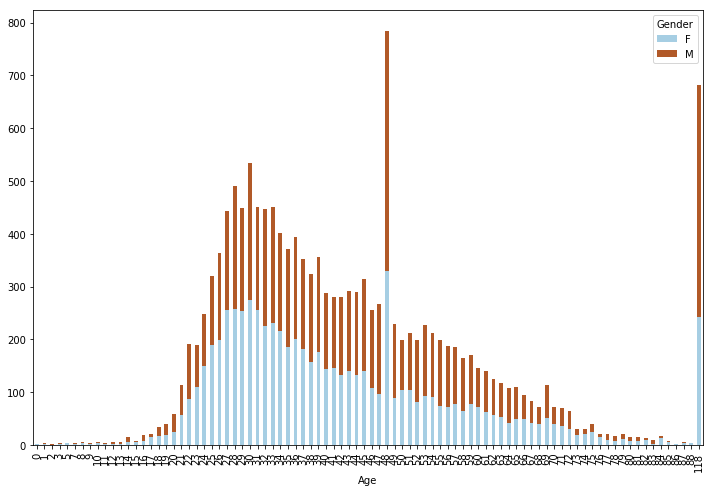

In [50]:

#Gender v/s Product
display_cat2cat(df,'Gender','Age')


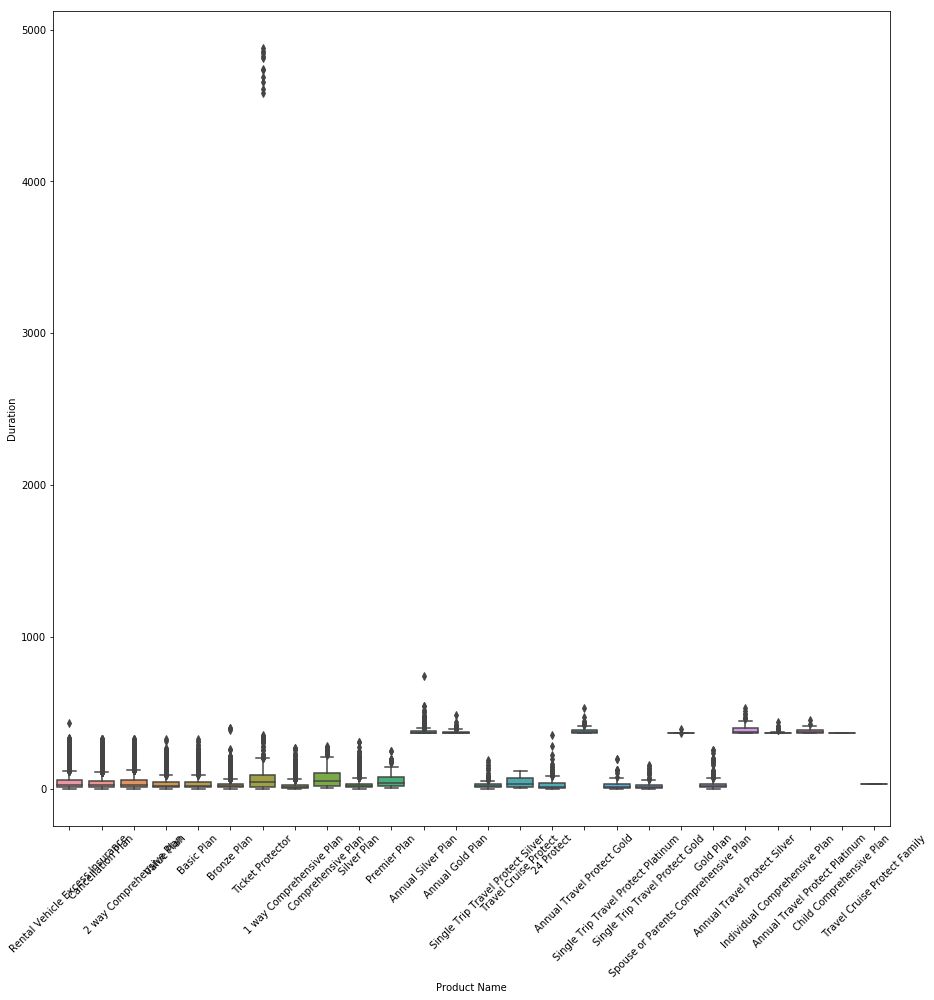

In [51]:

#Product v/s Duration
display_cat2num(df,'Product Name','Duration')


<Figure size 1080x576 with 0 Axes>

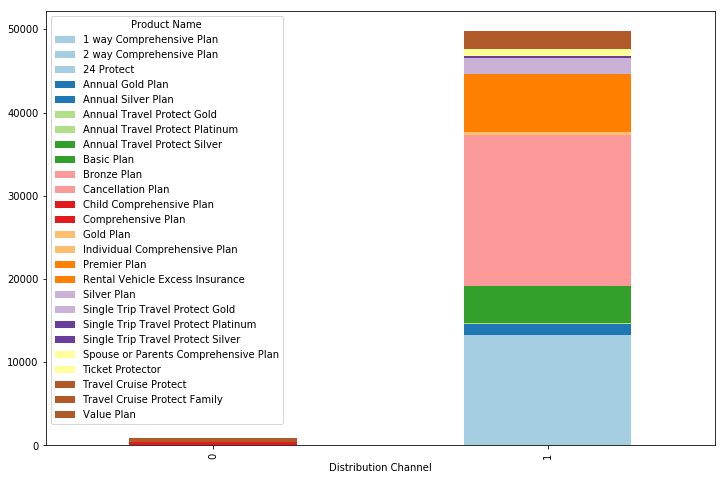

In [52]:




#Product v/s Dist CHannel
display_cat2cat(df,'Product Name','Distribution Channel')

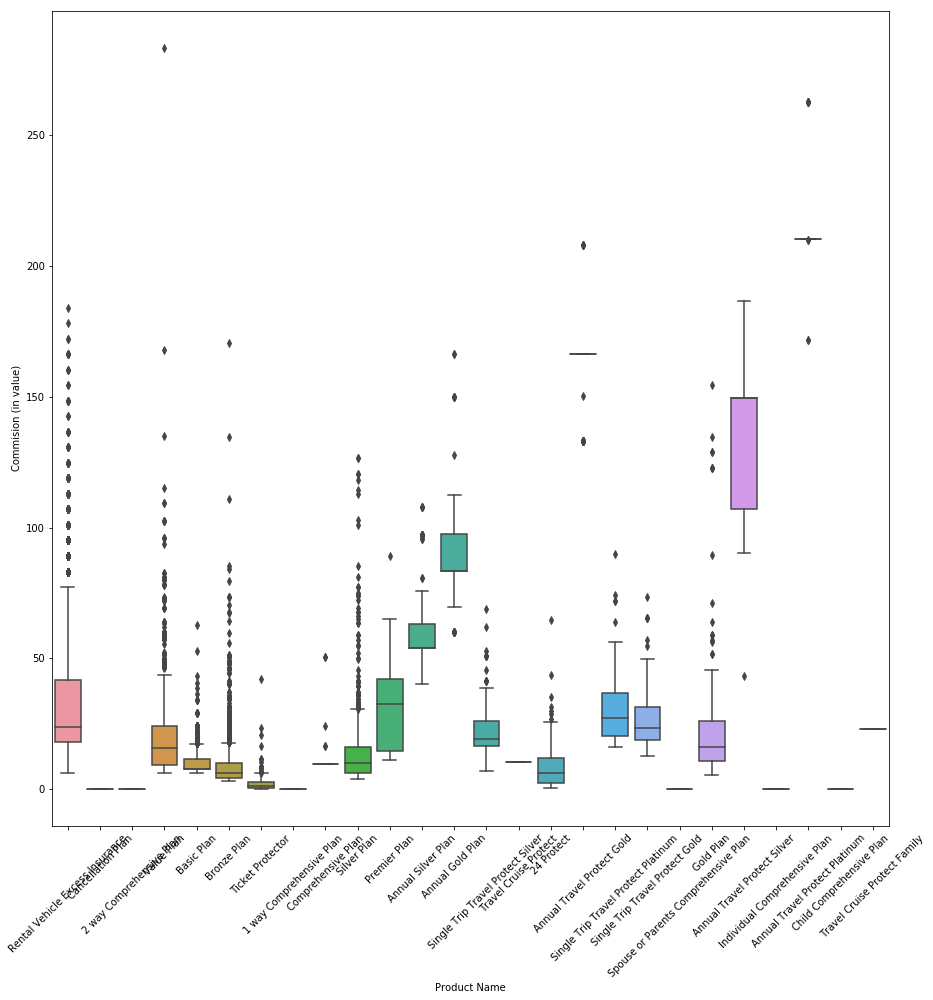

In [53]:

#Product v/s Commission
display_cat2num(df,'Product Name','Commision (in value)')

<Figure size 1080x576 with 0 Axes>

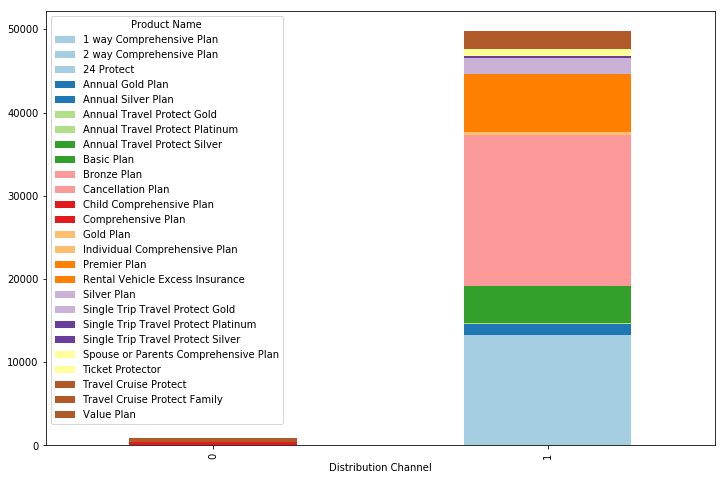

In [54]:

#Product v/s Dist Channel
display_cat2cat(df,'Product Name','Distribution Channel')

<Figure size 1080x576 with 0 Axes>

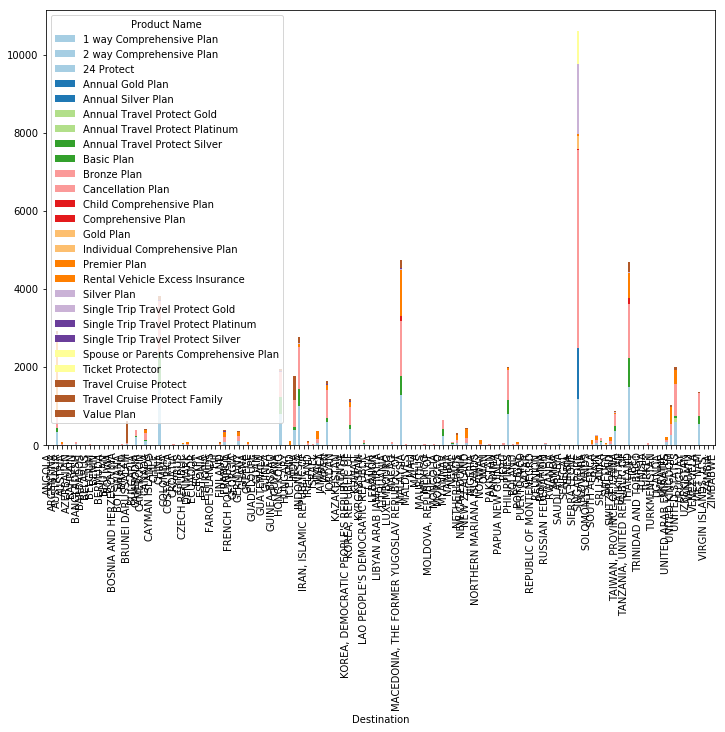

In [55]:

#Product v/s Destination
display_cat2cat(df,'Product Name','Destination')

<Figure size 1080x576 with 0 Axes>

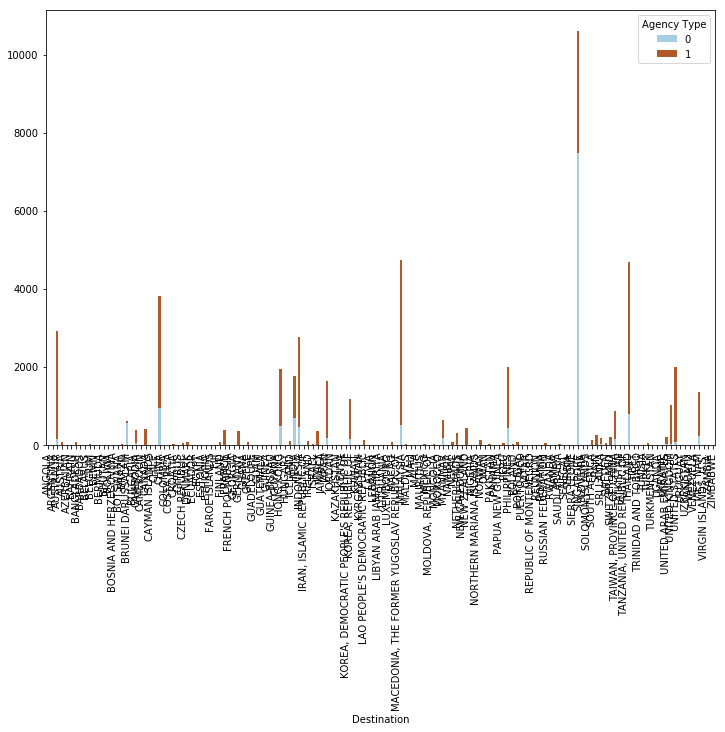

In [56]:

#Agency Type v/s Destination
display_cat2cat(df,'Agency Type','Destination')

<Figure size 1080x576 with 0 Axes>

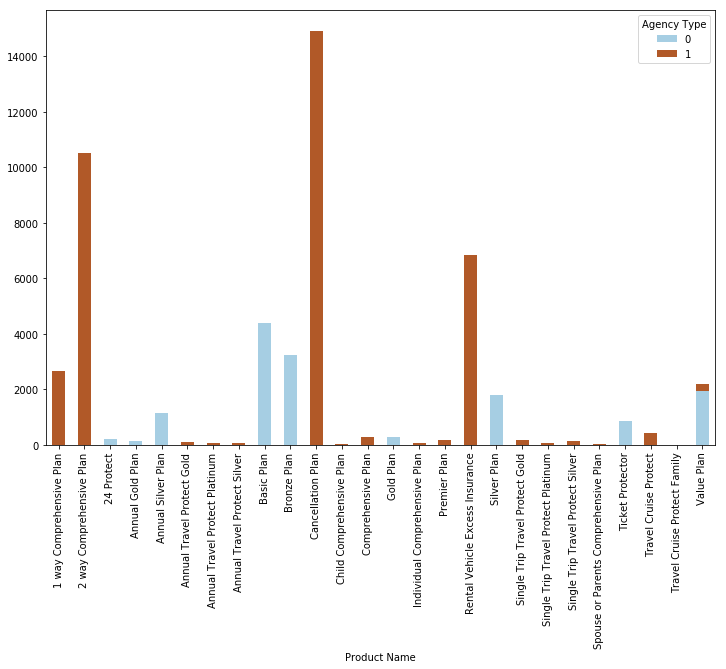

In [57]:

#Agency Type v/s Product Name
display_cat2cat(df,'Agency Type','Product Name')

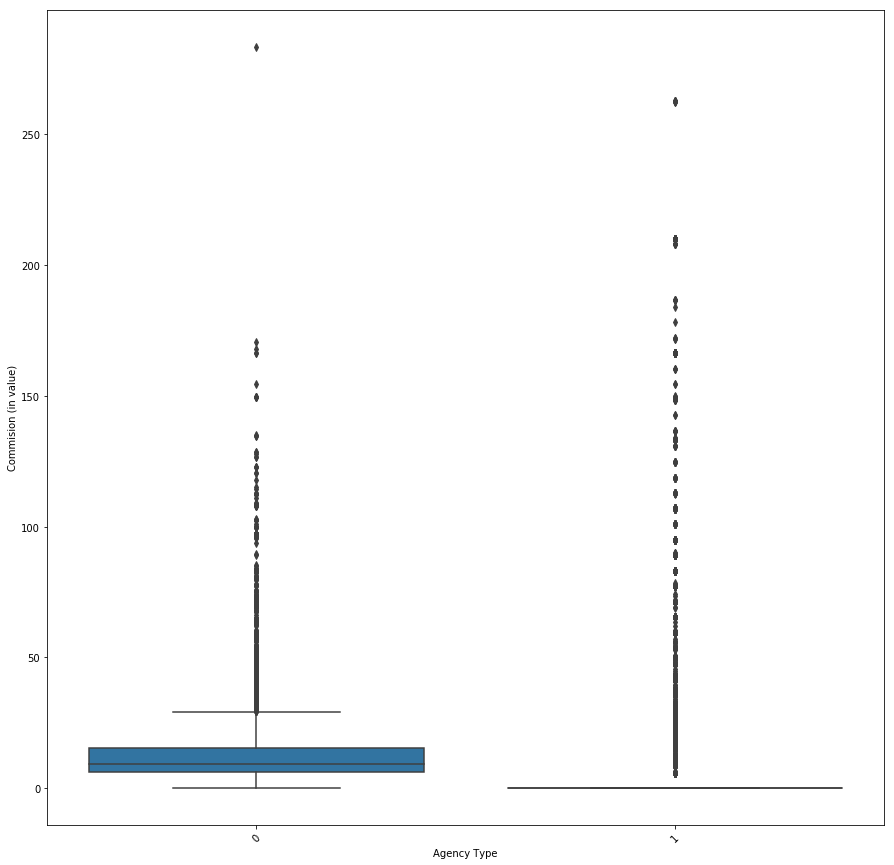

In [58]:

#Agency Type v/s Commision 
display_cat2num(df,'Agency Type','Commision (in value)')

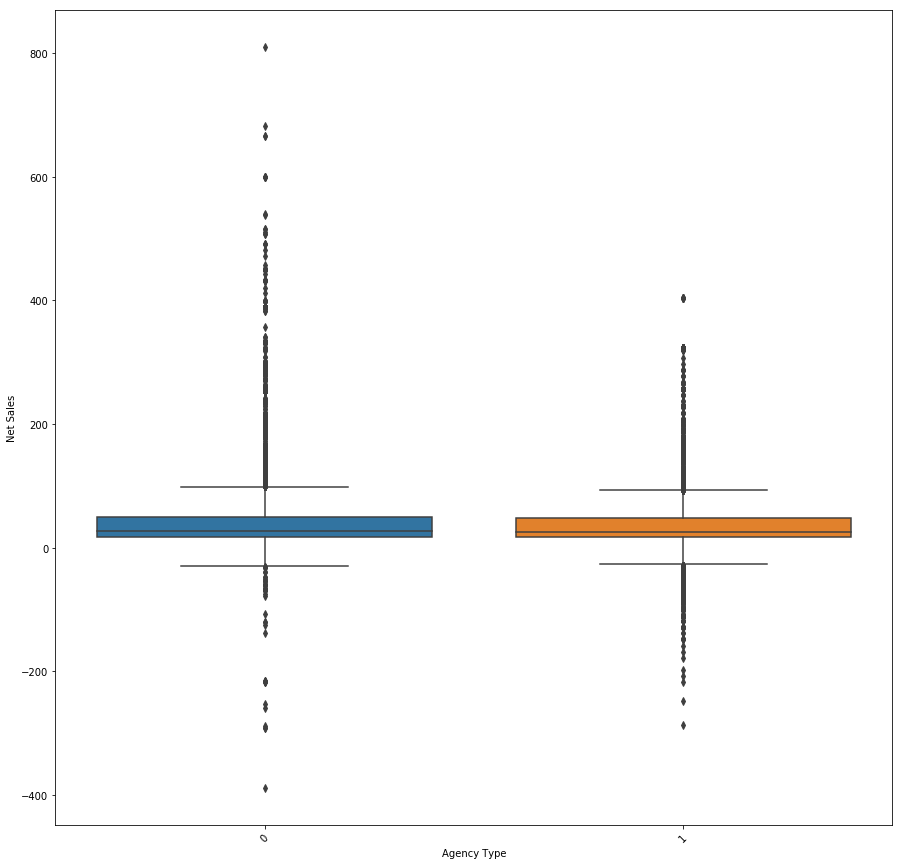

In [59]:
#Agency Type v/s Commision 
display_cat2num(df,'Agency Type','Net Sales')

**Insights**
1. Duration have outliers
2. Net sales have outliers
3. Commission have outliers
4. Age has outliers

In [60]:
# Treating outliers in duration column
df[df['Duration']<0]

ID Agency  Agency Type  Distribution Channel Product Name  Claim  \
4072   52588    JZI            0                     1   Basic Plan      0   
39019  56668    JZI            0                     1   Basic Plan      0   
48468  14943    JZI            0                     1   Basic Plan      0   

       Duration        Destination  Net Sales  Commision (in value) Gender  \
4072         -1  BRUNEI DARUSSALAM       18.0                   6.3    NaN   
39019        -1          INDONESIA       18.0                   6.3    NaN   
48468        -2         BANGLADESH       22.0                   7.7      M   

       Age  
4072   118  
39019  118  
48468  118

In [61]:
# replacing negative duration by median
df_test["Duration"] = np.where(df_test["Duration"] <0, df_test.Duration.median(),df_test['Duration'])

df["Duration"] = np.where(df["Duration"] <0, df.Duration.median(),df['Duration'])

In [62]:
# Treating outliers in Age column
df[df['Age']==0].Age.count()

2

In [63]:
df1 = df[df['Age']!=0]
df1 = df1[df1['Age']<=100]
median_val= df1.Age.median()
df2 = df_test[df_test['Age']!=0]
df2 = df2[df2['Age']<=100]
median_val_1= df2.Age.median()

In [64]:
# replacing age == 0 by median
df_test["Age"] = np.where(df_test["Age"] ==0, median_val_1,df_test['Age'])
df["Age"] = np.where(df["Age"] ==0, median_val,df['Age'])

In [65]:
df[df['Age']>=100].Age.count()

797

In [66]:
# replacing values >100 duration by median
df_test["Age"] = np.where(df_test["Age"] >100, median_val_1,df_test['Age'])

df["Age"] = np.where(df["Age"] >100, median_val,df['Age'])

In [67]:
df.head()

ID Agency  Agency Type  Distribution Channel  \
0   3433    CWT            1                     1   
1   4339    EPX            1                     1   
2  34590    CWT            1                     1   
3  55816    EPX            1                     1   
4  13816    EPX            1                     1   

                      Product Name  Claim  Duration         Destination  \
0  Rental Vehicle Excess Insurance      0       7.0            MALAYSIA   
1                Cancellation Plan      0      85.0           SINGAPORE   
2  Rental Vehicle Excess Insurance      0      11.0            MALAYSIA   
3         2 way Comprehensive Plan      0      16.0           INDONESIA   
4                Cancellation Plan      0      10.0  KOREA, REPUBLIC OF   

   Net Sales  Commision (in value) Gender   Age  
0        0.0                 17.82    NaN  31.0  
1       69.0                  0.00    NaN  36.0  
2       19.8                 11.88    NaN  75.0  
3       20.0                  0.00    NaN  32.0  
4       15.0                  0.00    NaN  29.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


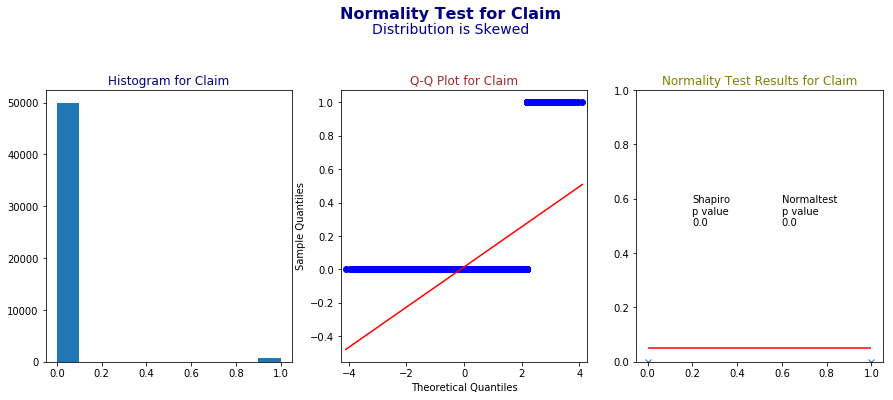

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


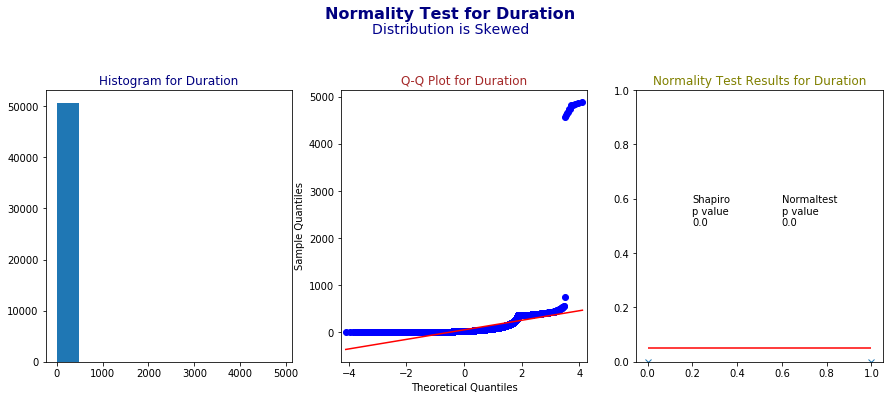

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


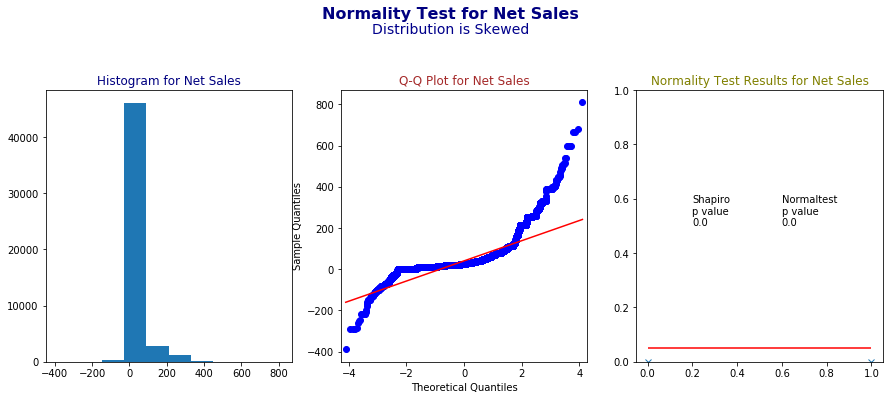

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


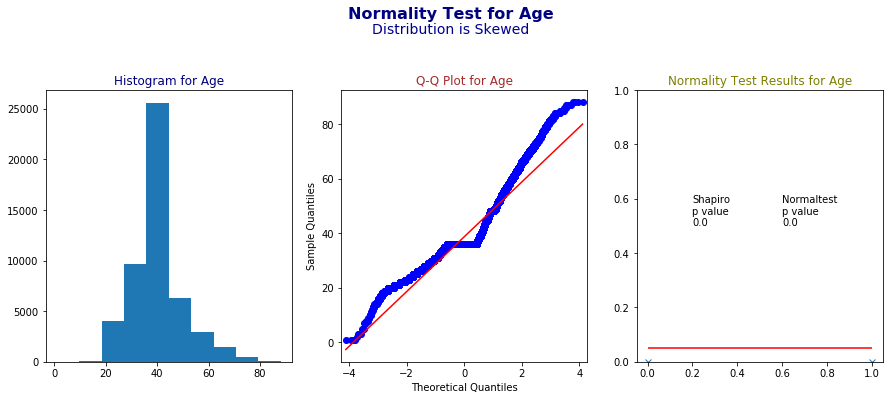

In [68]:
cols = ['Claim','Duration','Net Sales','Age']
for c in cols:
    normality_plots(df,c)

**Insights**
1. None of the variables in the given data set follow the normal distribution

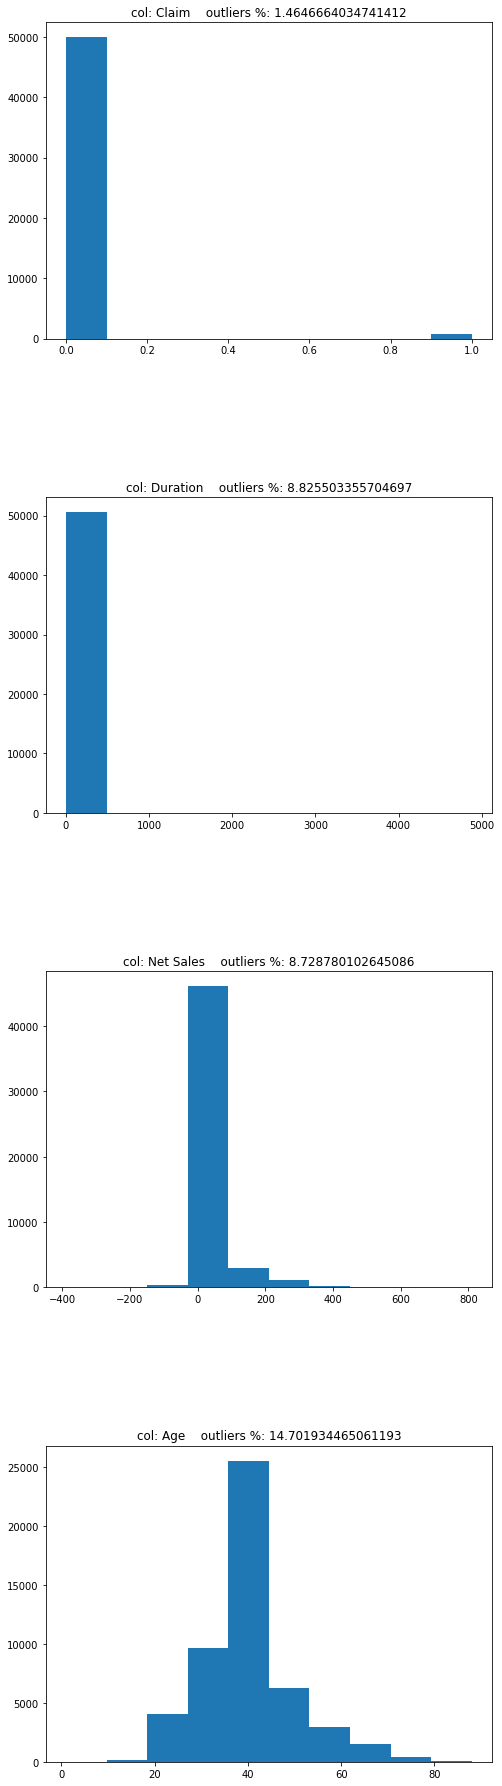

In [69]:
df1 =  df[['Claim','Duration','Net Sales','Age']]
df_hist(df1)

**Insights**
1. Agency type is highly imbalanced
2. Distribution channel is highly imbalanced
3. Claim is highly imbalanced
4. agency_>10000 is slightly imbalanced
5. agency_between 10000 and 5000 is imbalanced
6. agency_less_than 1000 is highly imbalanced
7. product_between 10000 and 5000 is highly imbalanced
8. prcduct_between 5000 and 1000 is imbalanced
9. product_less_than 100 is highly imbalanced
10. country>10000 is highly imbalanced
11. country between 10000 and 5000 is imbalanced
12. country less than 1000 is imbalanced

In [70]:
df1 =  df[['Claim','Duration','Net Sales','Age']]
get_basic_measures(df1)

col    min     max       mean
0      Claim    0.0     1.0   0.014647
1   Duration    0.0  4881.0  49.414765
2  Net Sales -389.0   810.0  40.837350
3        Age    1.0    88.0  38.719601

In [71]:
df1 =  df[['Claim','Duration','Net Sales','Age']]
for col in df1.columns:
    print(col,' has ',outlier_percentage(df1,col),' % of outliers')

Claim  has  1.4646664034741412  % of outliers
Duration  has  8.825503355704697  % of outliers
Net Sales  has  8.728780102645086  % of outliers
Age  has  14.701934465061193  % of outliers


**Insights**
1. Claim column has 1.5% outliers. but min is 0, max is 1 so we can neglect that
2. Distribution Channel has 1.7% of outliers. but min is 0, max is 1 so we can neglect that
3. Duration has 8.8% of outliers. min is -2 max is 4881 - possible outliers
4. Net Sales has 8.7% of outliers. -389 is min, 810.0 is max
5. Age has 9.29% of utliers, 0 is min and 118.0	- possible outliers


In [72]:
cols = ['Duration','Net Sales','Commision (in value)','Age']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


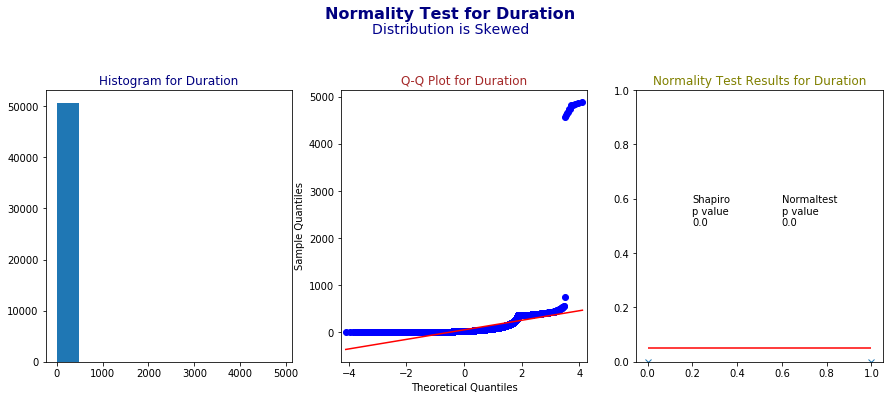

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


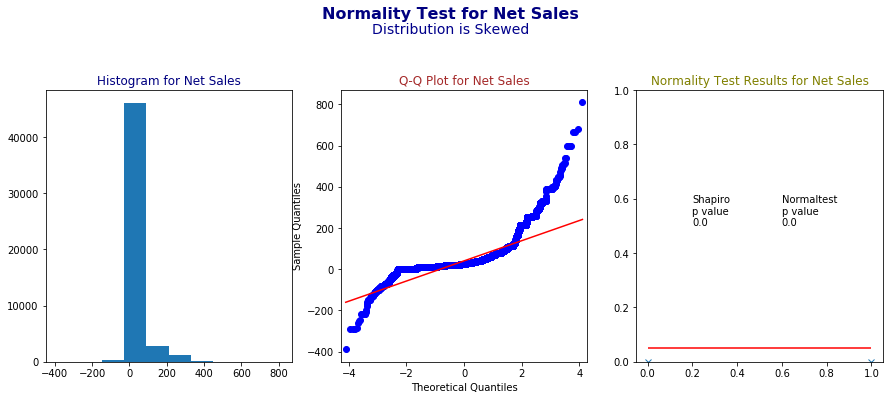

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


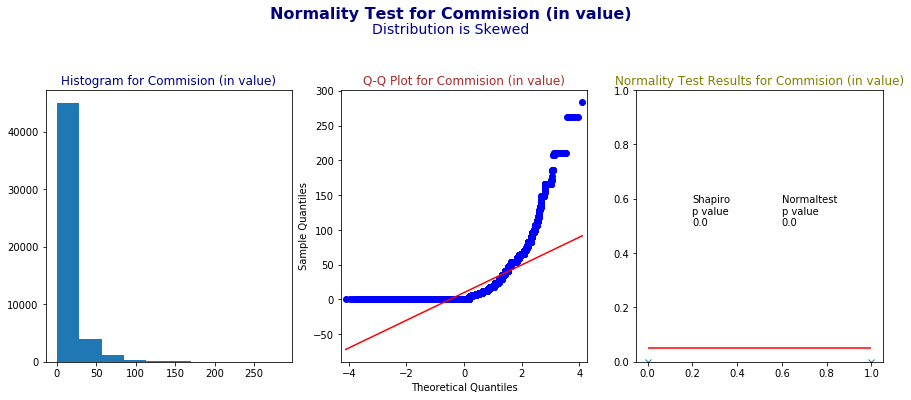

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


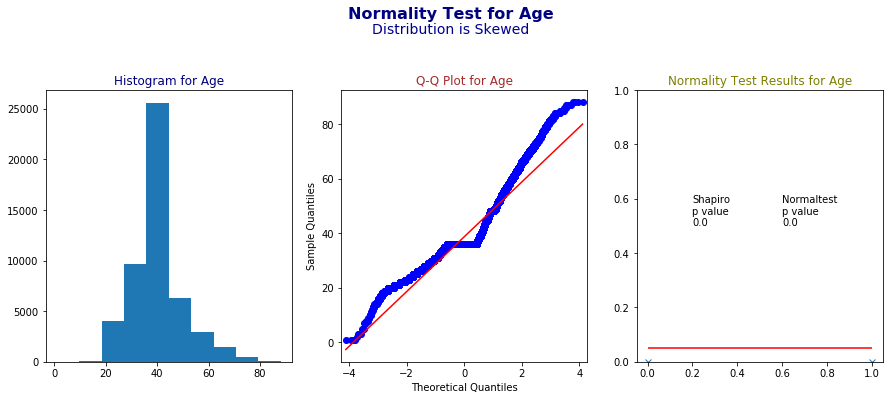

In [73]:
for c in cols:
    normality_plots(df,c)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 12 columns):
ID                      50660 non-null int64
Agency                  50660 non-null object
Agency Type             50660 non-null int32
Distribution Channel    50660 non-null int32
Product Name            50660 non-null object
Claim                   50660 non-null int64
Duration                50660 non-null float64
Destination             50660 non-null object
Net Sales               50660 non-null float64
Commision (in value)    50660 non-null float64
Gender                  14614 non-null object
Age                     50660 non-null float64
dtypes: float64(4), int32(2), int64(2), object(4)
memory usage: 4.3+ MB


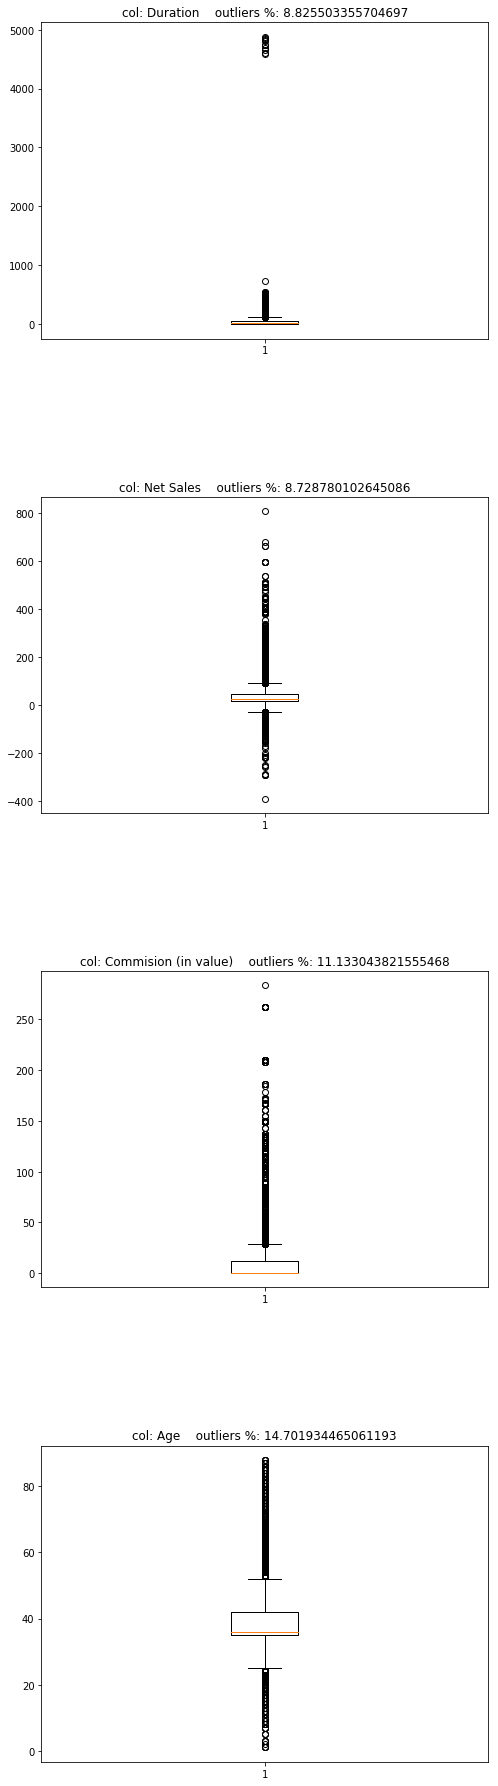

In [75]:
df1 = df[['Duration','Net Sales','Commision (in value)','Age']]
df1.head()
df_boxplot(df1)

In [76]:
df.nunique()

ID                      50660
Agency                     16
Agency Type                 2
Distribution Channel        2
Product Name               26
Claim                       2
Duration                  442
Destination               144
Net Sales                1053
Commision (in value)      968
Gender                      2
Age                        86
dtype: int64

In [77]:
df.Gender.unique()

array([nan, 'F', 'M'], dtype=object)

In [78]:
df.Gender.mode()[0]

'M'

In [79]:
df.Gender.value_counts()

M    7537
F    7077
Name: Gender, dtype: int64

In [80]:
df1=df
df2 = df_test
##df1.drop(['ID'],axis=1,inplace = True)
df2.head()

ID Agency  Agency Type  Distribution Channel  \
0  25902    CWT            1                     1   
1  19535    EPX            1                     1   
2  43717    EPX            1                     1   
3  48271    EPX            1                     1   
4  52318    EPX            1                     1   

                      Product Name  Duration Destination  Net Sales  \
0  Rental Vehicle Excess Insurance      58.0     ICELAND       49.5   
1         2 way Comprehensive Plan       4.0   SINGAPORE       20.0   
2         2 way Comprehensive Plan      68.0    VIET NAM       20.0   
3         2 way Comprehensive Plan      41.0       CHINA       28.0   
4                Cancellation Plan      16.0   SINGAPORE       11.0   

   Commision (in value) Gender   Age  
0                  29.7    NaN  47.0  
1                   0.0    NaN  24.0  
2                   0.0    NaN  36.0  
3                   0.0    NaN  36.0  
4                   0.0    NaN  36.0

In [81]:
df1 = df.groupby(['Agency','Agency Type','Destination']).apply(lambda x: x.mode())
df2 = df_test.groupby(['Agency','Agency Type','Destination']).apply(lambda x: x.mode())
df2.head()

ID Agency  Agency Type  \
Agency Agency Type Destination                                
ADM    1           FRANCE      0   6700    ADM          1.0   
                               1   6864    NaN          NaN   
                               2  15509    NaN          NaN   
                               3  24151    NaN          NaN   
                               4  28068    NaN          NaN   

                                  Distribution Channel Product Name  Duration  \
Agency Agency Type Destination                                                  
ADM    1           FRANCE      0                   1.0   Value Plan      48.0   
                               1                   NaN          NaN       NaN   
                               2                   NaN          NaN       NaN   
                               3                   NaN          NaN       NaN   
                               4                   NaN          NaN       NaN   

                                 Destination  Net Sales  Commision (in value)  \
Agency Agency Type Destination                                                  
ADM    1           FRANCE      0      FRANCE        0.0                 22.04   
                               1         NaN        NaN                 32.68   
                               2         NaN        NaN                 49.40   
                               3         NaN        NaN                   NaN   
                               4         NaN        NaN                   NaN   

                                 Gender   Age  
Agency Agency Type Destination                 
ADM    1           FRANCE      0      F  22.0  
                               1      M   NaN  
                               2    NaN   NaN  
                               3    NaN   NaN  
                               4    NaN   NaN

In [82]:
df1=df1['Gender']
df2 = df2['Gender']
df1.columns = ['Gender_Mode']
df2.columns = ['Gender_Mode']
df2.head()


Agency  Agency Type  Destination   
ADM     1            FRANCE       0      F
                                  1      M
                                  2    NaN
                                  3    NaN
                                  4    NaN
Name: Gender, dtype: object

In [83]:
df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)
df2.head()

Gender
Agency Agency Type Destination         
ADM    1           FRANCE      0      F
                               1      M
                               2    NaN
                               3    NaN
                               4    NaN

In [84]:
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

In [85]:
df2.columns

Index(['Agency', 'Agency Type', 'Destination', 'level_3', 'Gender'], dtype='object')

In [86]:
df2.head()

Agency  Agency Type Destination  level_3 Gender
0    ADM            1      FRANCE        0      F
1    ADM            1      FRANCE        1      M
2    ADM            1      FRANCE        2    NaN
3    ADM            1      FRANCE        3    NaN
4    ADM            1      FRANCE        4    NaN

In [87]:
df1[df1['Destination']=='MALAYSIA']

Agency  Agency Type Destination  level_3 Gender
49       ADM            1    MALAYSIA        0    NaN
129      ART            0    MALAYSIA        0      M
130      ART            0    MALAYSIA        1    NaN
131      ART            0    MALAYSIA        2    NaN
132      ART            0    MALAYSIA        3    NaN
133      ART            0    MALAYSIA        4    NaN
134      ART            0    MALAYSIA        5    NaN
135      ART            0    MALAYSIA        6    NaN
136      ART            0    MALAYSIA        7    NaN
137      ART            0    MALAYSIA        8    NaN
138      ART            0    MALAYSIA        9    NaN
139      ART            0    MALAYSIA       10    NaN
140      ART            0    MALAYSIA       11    NaN
141      ART            0    MALAYSIA       12    NaN
142      ART            0    MALAYSIA       13    NaN
143      ART            0    MALAYSIA       14    NaN
144      ART            0    MALAYSIA       15    NaN
145      ART            0    MALAYSIA       16    NaN
146      ART            0    MALAYSIA       17    NaN
147      ART            0    MALAYSIA       18    NaN
148      ART            0    MALAYSIA       19    NaN
149      ART            0    MALAYSIA       20    NaN
150      ART            0    MALAYSIA       21    NaN
151      ART            0    MALAYSIA       22    NaN
152      ART            0    MALAYSIA       23    NaN
153      ART            0    MALAYSIA       24    NaN
154      ART            0    MALAYSIA       25    NaN
155      ART            0    MALAYSIA       26    NaN
156      ART            0    MALAYSIA       27    NaN
157      ART            0    MALAYSIA       28    NaN
...      ...          ...         ...      ...    ...
50336    TST            1    MALAYSIA      175    NaN
50337    TST            1    MALAYSIA      176    NaN
50338    TST            1    MALAYSIA      177    NaN
50339    TST            1    MALAYSIA      178    NaN
50340    TST            1    MALAYSIA      179    NaN
50341    TST            1    MALAYSIA      180    NaN
50342    TST            1    MALAYSIA      181    NaN
50343    TST            1    MALAYSIA      182    NaN
50344    TST            1    MALAYSIA      183    NaN
50345    TST            1    MALAYSIA      184    NaN
50346    TST            1    MALAYSIA      185    NaN
50347    TST            1    MALAYSIA      186    NaN
50348    TST            1    MALAYSIA      187    NaN
50349    TST            1    MALAYSIA      188    NaN
50350    TST            1    MALAYSIA      189    NaN
50351    TST            1    MALAYSIA      190    NaN
50352    TST            1    MALAYSIA      191    NaN
50353    TST            1    MALAYSIA      192    NaN
50354    TST            1    MALAYSIA      193    NaN
50355    TST            1    MALAYSIA      194    NaN
50356    TST            1    MALAYSIA      195    NaN
50357    TST            1    MALAYSIA      196    NaN
50358    TST            1    MALAYSIA      197    NaN
50359    TST            1    MALAYSIA      198    NaN
50360    TST            1    MALAYSIA      199    NaN
50361    TST            1    MALAYSIA      200    NaN
50362    TST            1    MALAYSIA      201    NaN
50363    TST            1    MALAYSIA      202    NaN
50364    TST            1    MALAYSIA      203    NaN
50365    TST            1    MALAYSIA      204    NaN

[4748 rows x 5 columns]

In [88]:
df1.columns = ['Agency','Agency Type','Destination','level_3','Gender_Mode']
df2.columns = ['Agency','Agency Type','Destination','level_3','Gender_Mode']

In [89]:
df1=df1[df1['level_3']==0]
df2 = df2[df2['level_3']==0]
df1.drop('level_3',axis=1,inplace=True)
df2.drop('level_3',axis=1,inplace=True)


In [90]:
df2.head()

Agency  Agency Type  Destination Gender_Mode
0     ADM            1       FRANCE           F
12    ADM            1    INDONESIA           M
13    ADM            1      MOROCCO           M
14    ADM            1  NETHERLANDS           F
16    ADM            1        SPAIN         NaN

In [91]:
df = pd.merge(df,df1,on=['Agency','Agency Type','Destination'])
df_test = pd.merge(df_test,df2,on=['Agency','Agency Type','Destination'])

In [92]:
df['Gender_1'] = df['Gender']
df_test['Gender_1'] = df_test['Gender']
df_test.head()

ID Agency  Agency Type  Distribution Channel  \
0  25902    CWT            1                     1   
1  37942    CWT            1                     1   
2  49217    CWT            1                     1   
3  54382    CWT            1                     1   
4  32746    CWT            1                     1   

                      Product Name  Duration Destination  Net Sales  \
0  Rental Vehicle Excess Insurance      58.0     ICELAND       49.5   
1  Rental Vehicle Excess Insurance      15.0     ICELAND       49.5   
2  Rental Vehicle Excess Insurance      10.0     ICELAND        0.0   
3  Rental Vehicle Excess Insurance      28.0     ICELAND        0.0   
4  Rental Vehicle Excess Insurance     117.0     ICELAND       39.6   

   Commision (in value) Gender   Age Gender_Mode Gender_1  
0                 29.70    NaN  47.0         NaN      NaN  
1                 29.70    NaN  31.0         NaN      NaN  
2                 29.70    NaN  38.0         NaN      NaN  
3                 53.46    NaN  29.0         NaN      NaN  
4                 23.76    NaN  34.0         NaN      NaN

In [93]:
df.Gender = df.Gender_1.fillna(df.Gender_Mode)
df_test.Gender = df_test.Gender_1.fillna(df_test.Gender_Mode)
df_test.head()

ID Agency  Agency Type  Distribution Channel  \
0  25902    CWT            1                     1   
1  37942    CWT            1                     1   
2  49217    CWT            1                     1   
3  54382    CWT            1                     1   
4  32746    CWT            1                     1   

                      Product Name  Duration Destination  Net Sales  \
0  Rental Vehicle Excess Insurance      58.0     ICELAND       49.5   
1  Rental Vehicle Excess Insurance      15.0     ICELAND       49.5   
2  Rental Vehicle Excess Insurance      10.0     ICELAND        0.0   
3  Rental Vehicle Excess Insurance      28.0     ICELAND        0.0   
4  Rental Vehicle Excess Insurance     117.0     ICELAND       39.6   

   Commision (in value) Gender   Age Gender_Mode Gender_1  
0                 29.70    NaN  47.0         NaN      NaN  
1                 29.70    NaN  31.0         NaN      NaN  
2                 29.70    NaN  38.0         NaN      NaN  
3                 53.46    NaN  29.0         NaN      NaN  
4                 23.76    NaN  34.0         NaN      NaN

In [94]:
df_test.Gender.value_counts()

M    1870
F    1809
Name: Gender, dtype: int64

In [95]:
df.Gender.value_counts()

F    9985
M    7818
Name: Gender, dtype: int64

In [96]:

df2 = pd.DataFrame(df_test.groupby('Destination')['Net Sales'].count()).reset_index()#-500-810
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df_test,df2, on = 'Destination')
df_test['country_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )

# encoding for df
df2 = pd.DataFrame(df.groupby('Destination')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df,df2, on = 'Destination')
df['country_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )

In [97]:

df2 = pd.DataFrame(df_test.groupby('Agency')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df_test,df2, on = 'Agency')
df_test['agency_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )

# encoding fo df
df2 = pd.DataFrame(df.groupby('Agency')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df,df2, on = 'Agency')
df['agency_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )
df_test.head()

ID Agency  Agency Type  Distribution Channel  \
0  25902    CWT            1                     1   
1  37942    CWT            1                     1   
2  49217    CWT            1                     1   
3  54382    CWT            1                     1   
4  32746    CWT            1                     1   

                      Product Name  Duration Destination  Net Sales  \
0  Rental Vehicle Excess Insurance      58.0     ICELAND       49.5   
1  Rental Vehicle Excess Insurance      15.0     ICELAND       49.5   
2  Rental Vehicle Excess Insurance      10.0     ICELAND        0.0   
3  Rental Vehicle Excess Insurance      28.0     ICELAND        0.0   
4  Rental Vehicle Excess Insurance     117.0     ICELAND       39.6   

   Commision (in value) Gender   Age Gender_Mode Gender_1        country_bin  \
0                 29.70    NaN  47.0         NaN      NaN  Between 0 and 250   
1                 29.70    NaN  31.0         NaN      NaN  Between 0 and 250   
2                 29.70    NaN  38.0         NaN      NaN  Between 0 and 250   
3                 53.46    NaN  29.0         NaN      NaN  Between 0 and 250   
4                 23.76    NaN  34.0         NaN      NaN  Between 0 and 250   

  agency_bin  
0      > 500  
1      > 500  
2      > 500  
3      > 500  
4      > 500

In [98]:
df2 = pd.DataFrame(df_test.groupby('Product Name')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df_test,df2, on = 'Product Name')
df_test['product_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )

# encoding for df
df2 = pd.DataFrame(df.groupby('Product Name')['Net Sales'].count()).reset_index()
df2.rename(columns={'Net Sales':'Claim_count'},inplace=True)
df1 = pd.merge(df,df2, on = 'Product Name')
df['product_bin'] = df1['Claim_count'].apply(lambda x: '> 500' if x > 500 else
                                                                     'Between 0 and 250'  if ((x>0) and (x < 250)) else
                                                                     'Between 250 and 500'   if ((x>250) and (x < 500)) else
                                                                     'Less than -250'  )
df_test.head()

ID Agency  Agency Type  Distribution Channel  \
0  25902    CWT            1                     1   
1  37942    CWT            1                     1   
2  49217    CWT            1                     1   
3  54382    CWT            1                     1   
4  32746    CWT            1                     1   

                      Product Name  Duration Destination  Net Sales  \
0  Rental Vehicle Excess Insurance      58.0     ICELAND       49.5   
1  Rental Vehicle Excess Insurance      15.0     ICELAND       49.5   
2  Rental Vehicle Excess Insurance      10.0     ICELAND        0.0   
3  Rental Vehicle Excess Insurance      28.0     ICELAND        0.0   
4  Rental Vehicle Excess Insurance     117.0     ICELAND       39.6   

   Commision (in value) Gender   Age Gender_Mode Gender_1        country_bin  \
0                 29.70    NaN  47.0         NaN      NaN  Between 0 and 250   
1                 29.70    NaN  31.0         NaN      NaN  Between 0 and 250   
2                 29.70    NaN  38.0         NaN      NaN  Between 0 and 250   
3                 53.46    NaN  29.0         NaN      NaN  Between 0 and 250   
4                 23.76    NaN  34.0         NaN      NaN  Between 0 and 250   

  agency_bin product_bin  
0      > 500       > 500  
1      > 500       > 500  
2      > 500       > 500  
3      > 500       > 500  
4      > 500       > 500

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50660 entries, 0 to 50659
Data columns (total 17 columns):
ID                      50660 non-null int64
Agency                  50660 non-null object
Agency Type             50660 non-null int32
Distribution Channel    50660 non-null int32
Product Name            50660 non-null object
Claim                   50660 non-null int64
Duration                50660 non-null float64
Destination             50660 non-null object
Net Sales               50660 non-null float64
Commision (in value)    50660 non-null float64
Gender                  17803 non-null object
Age                     50660 non-null float64
Gender_Mode             17803 non-null object
Gender_1                14614 non-null object
country_bin             50660 non-null object
agency_bin              50660 non-null object
product_bin             50660 non-null object
dtypes: float64(4), int32(2), int64(2), object(9)
memory usage: 6.6+ MB


In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12666 entries, 0 to 12665
Data columns (total 16 columns):
ID                      12666 non-null int64
Agency                  12666 non-null object
Agency Type             12666 non-null int32
Distribution Channel    12666 non-null int32
Product Name            12666 non-null object
Duration                12666 non-null float64
Destination             12666 non-null object
Net Sales               12666 non-null float64
Commision (in value)    12666 non-null float64
Gender                  3679 non-null object
Age                     12666 non-null float64
Gender_Mode             3679 non-null object
Gender_1                3605 non-null object
country_bin             12666 non-null object
agency_bin              12666 non-null object
product_bin             12666 non-null object
dtypes: float64(4), int32(2), int64(1), object(9)
memory usage: 1.5+ MB


In [101]:
#df_test=df_test[['agency_bin','product_bin','country_bin','Agency Type','Distribution Channel','Duration','Net Sales','Commision (in value)','Age','Gender']]
#df=df[['agency_bin','product_bin','country_bin','Agency Type','Distribution Channel','Claim','Duration','Net Sales','Commision (in value)','Age','Gender']]
df_test=df_test[['agency_bin','product_bin','country_bin','Agency Type','Distribution Channel','Duration','Gender_Mode','Net Sales','Commision (in value)','Age','Gender','Gender_1']]
df=df[['agency_bin','product_bin','country_bin','Agency Type','Distribution Channel','Claim','Duration','Gender_Mode','Net Sales','Commision (in value)','Age','Gender','Gender_1']]

In [102]:
df.head()

agency_bin product_bin country_bin  Agency Type  Distribution Channel  \
0      > 500       > 500       > 500            1                     1   
1      > 500       > 500       > 500            1                     1   
2      > 500       > 500       > 500            1                     1   
3      > 500       > 500       > 500            1                     1   
4      > 500       > 500       > 500            1                     1   

   Claim  Duration Gender_Mode  Net Sales  Commision (in value)   Age Gender  \
0      0       7.0         NaN        0.0                 17.82  31.0    NaN   
1      0      11.0         NaN       19.8                 11.88  75.0    NaN   
2      0      61.0         NaN       29.7                 17.82  48.0    NaN   
3      0      26.0         NaN       39.6                 23.76  43.0    NaN   
4      0      57.0         NaN       19.8                 11.88  31.0    NaN   

  Gender_1  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [103]:
ag_dummies = pd.get_dummies(df_test.agency_bin)
ag_dummies.columns = ['agency_> 500','agency_Between 0 and 250']
df_test = pd.concat([df_test, ag_dummies], axis=1)
# encoding for df
ag_dummies = pd.get_dummies(df.agency_bin)
ag_dummies.columns = ['agency_> 500','agency_Between 0 and 250','agency_Between 250 and 500']
df = pd.concat([df, ag_dummies], axis=1)

In [104]:
ag_dummies = pd.get_dummies(df_test.product_bin)
ag_dummies.columns = ['product_> 500','product_Between 0 and 250','product_Between 250 and 500']
df_test = pd.concat([df_test, ag_dummies], axis=1)
# encoding for df
ag_dummies = pd.get_dummies(df.product_bin)
ag_dummies.columns = ['product_> 500','product_Between 0 and 250','product_Between 250 and 500']
df = pd.concat([df, ag_dummies], axis=1)

In [105]:
df_test.isnull().sum()

agency_bin                        0
product_bin                       0
country_bin                       0
Agency Type                       0
Distribution Channel              0
Duration                          0
Gender_Mode                    8987
Net Sales                         0
Commision (in value)              0
Age                               0
Gender                         8987
Gender_1                       9061
agency_> 500                      0
agency_Between 0 and 250          0
product_> 500                     0
product_Between 0 and 250         0
product_Between 250 and 500       0
dtype: int64

In [106]:
ag_dummies = pd.get_dummies(df_test.country_bin)
ag_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12666 entries, 0 to 12665
Data columns (total 3 columns):
> 500                  12666 non-null uint8
Between 0 and 250      12666 non-null uint8
Between 250 and 500    12666 non-null uint8
dtypes: uint8(3)
memory usage: 136.1 KB


In [107]:
ag_dummies = pd.get_dummies(df_test.country_bin)
ag_dummies.columns = ['country_> 500','country_Between 0 and 250','country_Between 250 and 500']
df_test = pd.concat([df_test, ag_dummies], axis=1)
# encoding for df
ag_dummies = pd.get_dummies(df.country_bin)
ag_dummies.columns = ['country_> 500','country_Between 0 and 250','country_Between 250 and 500']
df = pd.concat([df, ag_dummies], axis=1)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50660 entries, 0 to 50659
Data columns (total 22 columns):
agency_bin                     50660 non-null object
product_bin                    50660 non-null object
country_bin                    50660 non-null object
Agency Type                    50660 non-null int32
Distribution Channel           50660 non-null int32
Claim                          50660 non-null int64
Duration                       50660 non-null float64
Gender_Mode                    17803 non-null object
Net Sales                      50660 non-null float64
Commision (in value)           50660 non-null float64
Age                            50660 non-null float64
Gender                         17803 non-null object
Gender_1                       14614 non-null object
agency_> 500                   50660 non-null uint8
agency_Between 0 and 250       50660 non-null uint8
agency_Between 250 and 500     50660 non-null uint8
product_> 500                  50660 non-null

In [109]:
df_test.head()

agency_bin product_bin        country_bin  Agency Type  \
0      > 500       > 500  Between 0 and 250            1   
1      > 500       > 500  Between 0 and 250            1   
2      > 500       > 500  Between 0 and 250            1   
3      > 500       > 500  Between 0 and 250            1   
4      > 500       > 500  Between 0 and 250            1   

   Distribution Channel  Duration Gender_Mode  Net Sales  \
0                     1      58.0         NaN       49.5   
1                     1      15.0         NaN       49.5   
2                     1      10.0         NaN        0.0   
3                     1      28.0         NaN        0.0   
4                     1     117.0         NaN       39.6   

   Commision (in value)   Age Gender Gender_1  agency_> 500  \
0                 29.70  47.0    NaN      NaN             1   
1                 29.70  31.0    NaN      NaN             1   
2                 29.70  38.0    NaN      NaN             1   
3                 53.46  29.0    NaN      NaN             1   
4                 23.76  34.0    NaN      NaN             1   

   agency_Between 0 and 250  product_> 500  product_Between 0 and 250  \
0                         0              1                          0   
1                         0              1                          0   
2                         0              1                          0   
3                         0              1                          0   
4                         0              1                          0   

   product_Between 250 and 500  country_> 500  country_Between 0 and 250  \
0                            0              0                          1   
1                            0              0                          1   
2                            0              0                          1   
3                            0              0                          1   
4                            0              0                          1   

   country_Between 250 and 500  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

In [110]:
df_test.isnull().sum()

agency_bin                        0
product_bin                       0
country_bin                       0
Agency Type                       0
Distribution Channel              0
Duration                          0
Gender_Mode                    8987
Net Sales                         0
Commision (in value)              0
Age                               0
Gender                         8987
Gender_1                       9061
agency_> 500                      0
agency_Between 0 and 250          0
product_> 500                     0
product_Between 0 and 250         0
product_Between 250 and 500       0
country_> 500                     0
country_Between 0 and 250         0
country_Between 250 and 500       0
dtype: int64

In [111]:
# backword fill to treat NaNs in Gender
df_test['Gender'] = df_test['Gender'].fillna(method='backfill')
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].mode()[0])

# Dropping Gender column

df['Gender'] = df['Gender'].fillna(method='backfill')
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0]) 

In [112]:
df.isnull().sum()

agency_bin                         0
product_bin                        0
country_bin                        0
Agency Type                        0
Distribution Channel               0
Claim                              0
Duration                           0
Gender_Mode                    32857
Net Sales                          0
Commision (in value)               0
Age                                0
Gender                             0
Gender_1                       36046
agency_> 500                       0
agency_Between 0 and 250           0
agency_Between 250 and 500         0
product_> 500                      0
product_Between 0 and 250          0
product_Between 250 and 500        0
country_> 500                      0
country_Between 0 and 250          0
country_Between 250 and 500        0
dtype: int64

In [113]:
df_test.isnull().sum()

agency_bin                        0
product_bin                       0
country_bin                       0
Agency Type                       0
Distribution Channel              0
Duration                          0
Gender_Mode                    8987
Net Sales                         0
Commision (in value)              0
Age                               0
Gender                            0
Gender_1                       9061
agency_> 500                      0
agency_Between 0 and 250          0
product_> 500                     0
product_Between 0 and 250         0
product_Between 250 and 500       0
country_> 500                     0
country_Between 0 and 250         0
country_Between 250 and 500       0
dtype: int64

In [114]:
df_test.Gender_1 = df_test.Gender_1.fillna(df_test.Gender)


In [115]:

df_test.drop(['Gender','Gender_Mode'],axis=1,inplace=True)
df_test.rename(columns={'Gender_1':'Gender'},inplace=True)

In [116]:

df.Gender_1 = df.Gender_1.fillna(df.Gender)
df.drop(['Gender','Gender_Mode'],axis=1,inplace=True)
df.rename(columns={'Gender_1':'Gender'},inplace=True)

In [117]:
df_test.drop(columns = ['agency_bin','product_bin','country_bin'],axis=1,inplace=True)
df.drop(columns = ['agency_bin','product_bin','country_bin'],axis=1,inplace=True)

In [118]:
df_test.isnull().sum()

Agency Type                    0
Distribution Channel           0
Duration                       0
Net Sales                      0
Commision (in value)           0
Age                            0
Gender                         0
agency_> 500                   0
agency_Between 0 and 250       0
product_> 500                  0
product_Between 0 and 250      0
product_Between 250 and 500    0
country_> 500                  0
country_Between 0 and 250      0
country_Between 250 and 500    0
dtype: int64

In [119]:
df_test['Gender']= label_encoder.fit_transform(df_test['Gender'])
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [120]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [131]:
'''X = df
y = df['Claim']
  
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X, y, train_size=0.7, random_state=7)

print(len(X_train_SMOTE))
print(len(y_train_SMOTE))
print(len(X_test_SMOTE))
print(len(y_test_SMOTE))

smote = SMOTE(random_state=2)
X_ov, y_ov = smote.fit_resample(X_train_SMOTE, y_train_SMOTE)
X_ov = pd.DataFrame(X_ov) 
X_ov.columns = df.columns
X_ov.drop('Claim', axis=1 ,inplace=True)
print(len(X_ov))
print(len(y_ov))'''
# Split entire dataset into train test data

#X = trans.drop('Class', axis=1)
X = df
y = df['Claim']

X_train_random_undersamp, X_test_random_undersamp, y_train_random_undrsamp, y_test_random_undersamp = train_test_split(X, y, train_size=0.7, random_state=7)


#Find Number of samples which are minority
minority_Claim = len(X_train_random_undersamp[X_train_random_undersamp['Claim'] == 1])
print(np.array(minority_Claim))

#Get indices of undersampled data
majority_indices = X_train_random_undersamp[X_train_random_undersamp.Claim == 0].index
print(majority_indices)

#Random sample with minority indices
random_indices = np.random.choice(majority_indices,minority_Claim,replace=False)
#print(random_indices)

#Find the indices of majority samples
majority_indices = X_train_random_undersamp[X_train_random_undersamp.Claim == 1].index
#print(majority_indices)

#Concat fraud indices with sample non-fraud ones
under_sample_indices = np.concatenate([majority_indices,random_indices])
#print(under_sample_indices)

#Get Balance Dataframe
df_final_random_undersample = X_train_random_undersamp.loc[under_sample_indices]
y_ROV = df_final_random_undersample['Claim']
df_final_random_undersample.drop('Claim', axis=1 ,inplace=True)

X_ov = df_final_random_undersample
X_test_SMOTE=X_test_random_undersamp
y_ov = y_ROV
y_test_SMOTE=y_test_random_undersamp

514
Int64Index([ 9199,  4150, 26328, 14412, 44367,  9144,  6971, 37781, 41597,
            40815,
            ...
            45960, 27354, 28232,  2583, 34140, 13927,   919, 38467, 10742,
            49689],
           dtype='int64', length=34948)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [132]:
X_train_random_undersamp.columns

Index(['Agency Type', 'Distribution Channel', 'Claim', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Gender', 'agency_> 500',
       'agency_Between 0 and 250', 'agency_Between 250 and 500',
       'product_> 500', 'product_Between 0 and 250',
       'product_Between 250 and 500', 'country_> 500',
       'country_Between 0 and 250', 'country_Between 250 and 500'],
      dtype='object')

In [133]:
df_test.columns

Index(['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Gender', 'agency_> 500',
       'agency_Between 0 and 250', 'agency_Between 250 and 500',
       'product_> 500', 'product_Between 0 and 250',
       'product_Between 250 and 500', 'country_> 500',
       'country_Between 0 and 250', 'country_Between 250 and 500'],
      dtype='object')

In [134]:
len(X_ov.columns)

16

In [135]:
X_ov.columns

Index(['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Gender', 'agency_> 500',
       'agency_Between 0 and 250', 'agency_Between 250 and 500',
       'product_> 500', 'product_Between 0 and 250',
       'product_Between 250 and 500', 'country_> 500',
       'country_Between 0 and 250', 'country_Between 250 and 500'],
      dtype='object')

In [136]:
len(df_test.columns)

16

In [137]:
df_test['agency_Between 250 and 500'] = 0

In [138]:
df_test = df_test[['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Gender', 'agency_> 500',
       'agency_Between 0 and 250', 'agency_Between 250 and 500',
       'product_> 500', 'product_Between 0 and 250',
       'product_Between 250 and 500', 'country_> 500',
       'country_Between 0 and 250', 'country_Between 250 and 500']]

In [139]:
X_test_SMOTE = X_test_SMOTE[['Agency Type', 'Distribution Channel', 'Duration', 'Net Sales',
       'Commision (in value)', 'Age', 'Gender', 'agency_> 500',
       'agency_Between 0 and 250', 'agency_Between 250 and 500',
       'product_> 500', 'product_Between 0 and 250',
       'product_Between 250 and 500', 'country_> 500',
       'country_Between 0 and 250', 'country_Between 250 and 500']]

In [140]:
#Random Forest
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_ov,y_ov)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [141]:
#y_predict = clf.predict(X_test_SMOTE)
y_predict_real = clf.predict(df_test)

In [143]:
df_test_new = pd.read_csv(raw_data_path_test)

In [144]:
df_test_new = df_test_new['ID']
df_test_new.reset_index()

index     ID
0          0  25902
1          1  19535
2          2  43717
3          3  48271
4          4  52318
5          5  31820
6          6   5943
7          7  45799
8          8   4666
9          9  10884
10        10  18279
11        11  39099
12        12  18184
13        13  33106
14        14  54962
15        15  17753
16        16  18649
17        17  33032
18        18   9885
19        19  62676
20        20   9448
21        21  49527
22        22  51975
23        23   9287
24        24  17873
25        25  50238
26        26  14136
27        27  24479
28        28  15068
29        29  49306
...      ...    ...
12636  12636  13910
12637  12637  57941
12638  12638  39748
12639  12639  40755
12640  12640  39825
12641  12641  16875
12642  12642  28144
12643  12643  35401
12644  12644   1854
12645  12645  23185
12646  12646  31105
12647  12647  30112
12648  12648  36166
12649  12649  47384
12650  12650   6946
12651  12651  25476
12652  12652  19263
12653  12653  47284
12654  12654  17947
12655  12655   2052
12656  12656   9307
12657  12657  26990
12658  12658  29511
12659  12659  13442
12660  12660    585
12661  12661  11166
12662  12662  47539
12663  12663  61110
12664  12664  33879
12665  12665  48914

[12666 rows x 2 columns]

In [145]:
df_test_new = pd.DataFrame(df_test_new)

In [146]:
df_test_new=df_test_new.reset_index()

In [147]:
y_predict_real = clf.predict(df_test)
df5 = pd.DataFrame(y_predict_real)
df5.reset_index(inplace =True)
df6 = pd.merge(df5,df_test_new, on ='index')
df6.drop('index',axis=1,inplace=True)
df6.columns=['Claim','ID']
df6 = df6[['ID','Claim']]

In [148]:
df6.to_csv("submission_20.csv")

In [ ]:
df4 = pd.DataFrame(y_predict)
df4[0].unique()
df5 = pd.DataFrame(y_predict_real)
df5[0].unique()

In [ ]:
print(classification_report(y_test_SMOTE,y_predict))

In [ ]:
sklearn.metrics.precision_score(y_test_SMOTE,y_predict)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=8, verbose=3)
rfe.fit(X_ov, y_ov)
rfe_df1 = rfe.fit_transform(X_ov, y_ov)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

In [ ]:
df5.reset_index(inplace = True)

In [ ]:
df5.columns = ['index','Claim']

In [ ]:
df5.head()

In [ ]:
df6 = pd.merge(df5,df_test_new, on ='index')

In [ ]:
df6.drop('index',axis=1,inplace=True)

In [ ]:
df6.to_csv('submission_1.csv')

In [ ]:
from sklearn.tree import DecisionTreeClassifier



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_ov,y_ov)
y_predict_dtc = dtc.predict(X_test_SMOTE)


In [ ]:

pd.crosstab(pd.Series(y_predict_dtc), pd.Series(y_test_SMOTE))
print(classification_report(y_predict_dtc,y_test_SMOTE))

In [ ]:
y_predict_real = dtc.predict(df_test)
df5 = pd.DataFrame(y_predict_real)
df5.reset_index(inplace =True)
df6 = pd.merge(df5,df_test_new, on ='index')
df6.drop('index',axis=1,inplace=True)
df6.columns=['Claim','ID']
df6 = df6[['ID','Claim']]

In [ ]:
df6.head()

In [ ]:
df6.to_csv('submission_2.csv')

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(X_ov, y_ov)
plt.plot(kind='SVC')


In [ ]:
import datetime

currentDT = datetime.datetime.now()
print (str(currentDT))

In [ ]:
y_predict_real = model.predict(df_test)
df5 = pd.DataFrame(y_predict_real)
df5.reset_index(inplace =True)
df6 = pd.merge(df5,df_test_new, on ='index')
df6.drop('index',axis=1,inplace=True)
df6.columns=['Claim','ID']
df6 = df6[['ID','Claim']]

currentDT = datetime.datetime.now()
print (str(currentDT))

In [ ]:
df6.to_csv('submission_4.csv')

In [ ]:

currentDT = datetime.datetime.now()
print (str(currentDT))
model = svm.SVC(kernel='rbf')
model.fit(X_ov, y_ov)
plt.plot(kind='SVC')

currentDT = datetime.datetime.now()
print (str(currentDT))

In [ ]:
y_predict_real = model.predict(df_test)
df5 = pd.DataFrame(y_predict_real)
df5.reset_index(inplace =True)
df6 = pd.merge(df5,df_test_new, on ='index')
df6.drop('index',axis=1,inplace=True)
df6.columns=['Claim','ID']
df6 = df6[['ID','Claim']]

currentDT = datetime.datetime.now()
print (str(currentDT))

In [ ]:
df6.to_csv('submission_3.csv')

In [ ]:
x_test_SMOTE.head()

In [ ]:
y_predict_real = model.predict(x)
df5 = pd.DataFrame(y_predict_real)
df5.reset_index(inplace =True)
df6 = pd.merge(df5,df_test_new, on ='index')
df6.drop('index',axis=1,inplace=True)
df6.columns=['Claim','ID']
df6 = df6[['ID','Claim']]

currentDT = datetime.datetime.now()
print (str(currentDT))

In [ ]:
print(classification_report(y_test_SMOTE,y_predict))

In [ ]:

currentDT = datetime.datetime.now()
print (str(currentDT))
model = svm.SVC(kernel='poly')
model.fit(X_ov, y_ov)
plt.plot(kind='SVC')

currentDT = datetime.datetime.now()
print (str(currentDT))

In [ ]:
test_df.head()

In [ ]:
X_test_SMOTE.head()

In [ ]:
y_predict_real = model.predict(X_test_SMOTE)
df5 = pd.DataFrame(y_predict_real)
df5.reset_index(inplace =True)
df6 = pd.merge(df5,df_test_new, on ='index')
df6.drop('index',axis=1,inplace=True)
df6.columns=['Claim','ID']
df6 = df6[['ID','Claim']]

currentDT = datetime.datetime.now()
print (str(currentDT))

In [ ]:
print(classification_report(y_predict_real,y_test_SMOTE))

In [ ]:
df6.to_csv('submission_5.csv')